# **ABS - Australian Bureau of Statistics**
## **Lending Indicators Data**

## **Table 1.** 
Households; Housing finance; Total dwellings; By property purpose; New loan commitments; Values

### **Import Libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:


# Load CSV file
df_total_loans = pd.read_csv("../Datasets/df_total_loans.csv")
df_total_loans.head(5)

,date,segment,buyer_type,loan_count,loan_value_million
0,2002-09-01,Investor,Total,NaN,11009.5
1,2002-09-01,Owner-occupier,First Home Buyer,24529.0,4121.6
2,2002-09-01,Owner-occupier,Non-First Home Buyer,64722.0,12468.5
3,2002-09-01,Owner-occupier,Total,89705.0,16698.5
4,2002-09-01,Total,Total,NaN,27708.0


In [4]:
df_total_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                465 non-null    object 
 1   segment             465 non-null    object 
 2   buyer_type          465 non-null    object 
 3   loan_count          329 non-null    float64
 4   loan_value_million  465 non-null    float64
dtypes: float64(2), object(3)
memory usage: 18.3+ KB


In [5]:
# Value counts for segment
print("Segment value counts:")
print(df_total_loans["segment"].value_counts())

# Value counts for buyer_type
print("\nBuyer Type value counts:")
print(df_total_loans["buyer_type"].value_counts())


Segment value counts:
segment
Owner-occupier    279
Investor           93
Total              93
Name: count, dtype: int64

Buyer Type value counts:
buyer_type
Total                   279
First Home Buyer         93
Non-First Home Buyer     93
Name: count, dtype: int64


In [6]:
df_total_loans.describe()

,loan_count,loan_value_million
count,329.000000,465.000000
mean,61650.173252,28141.192043
std,31391.607683,18360.699880
min,18264.000000,3845.500000
25%,30609.000000,15066.300000
50%,60407.000000,23852.300000
75%,82555.000000,37701.600000
max,157887.000000,98005.100000


##### **Convert date to datetime**

In [7]:

df_total_loans["date"] = pd.to_datetime(df_total_loans["date"])

In [8]:
df_total_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                465 non-null    datetime64[ns]
 1   segment             465 non-null    object        
 2   buyer_type          465 non-null    object        
 3   loan_count          329 non-null    float64       
 4   loan_value_million  465 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 18.3+ KB


##### **Handling Missing Values**

In [9]:
df_total_loans.isnull().sum()

date                    0
segment                 0
buyer_type              0
loan_count            136
loan_value_million      0
dtype: int64

loan_count

Non-null: 329 (~71%)

Missing values: 136 (~29%)

Reason for missing data:

Loan counts are not reported for aggregated “Total” rows. This is a structural missingness, not a data quality issue

In [10]:
# Drop rows where both segment and buyer_type are "Total"
df_clean = df_total_loans[~((df_total_loans["segment"] == "Total") & 
                             (df_total_loans["buyer_type"] == "Total"))].copy()


In [11]:
# Drop Total/Total and Owner-occupier Total rows
df_clean = df_total_loans[~(
    ((df_total_loans["segment"] == "Total") & (df_total_loans["buyer_type"] == "Total")) |
    ((df_total_loans["segment"] == "Owner-occupier") & (df_total_loans["buyer_type"] == "Total"))
)].copy()


In [12]:
df_clean.head(5)

,date,segment,buyer_type,loan_count,loan_value_million
0,2002-09-01,Investor,Total,NaN,11009.5
1,2002-09-01,Owner-occupier,First Home Buyer,24529.0,4121.6
2,2002-09-01,Owner-occupier,Non-First Home Buyer,64722.0,12468.5
5,2002-12-01,Investor,Total,NaN,10978.6
6,2002-12-01,Owner-occupier,First Home Buyer,23090.0,4045.5


Investor loan counts were not consistently reported in early 2000s, but the total loan value was available. Recent years have complete data.

##### **Check Duplicate Records**

In [64]:
# Count total duplicate rows
df_clean.duplicated().sum()


np.int64(0)

* No duplicated records found

#### **Outlier Detection**

In [65]:


# Example with loan_value_million
Q1 = df_clean['loan_value_million'].quantile(0.25)
Q3 = df_clean['loan_value_million'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier condition
outliers = df_clean[(df_clean['loan_value_million'] < Q1 - 1.5 * IQR) |
                    (df_clean['loan_value_million'] > Q3 + 1.5 * IQR)]

# Show outliers
print(outliers)


          date         segment            buyer_type  loan_count  \
372 2021-03-01  Owner-occupier  Non-First Home Buyer     70636.0   
377 2021-06-01  Owner-occupier  Non-First Home Buyer     72186.0   
382 2021-09-01  Owner-occupier  Non-First Home Buyer     70634.0   
387 2021-12-01  Owner-occupier  Non-First Home Buyer     68470.0   
392 2022-03-01  Owner-occupier  Non-First Home Buyer     66990.0   
397 2022-06-01  Owner-occupier  Non-First Home Buyer     62282.0   
457 2025-06-01  Owner-occupier  Non-First Home Buyer     53680.0   
460 2025-09-01        Investor                 Total     57624.0   
462 2025-09-01  Owner-occupier  Non-First Home Buyer     55171.0   

     loan_value_million  
372             39897.1  
377             43421.6  
382             44818.8  
387             44190.2  
392             44915.0  
397             41872.2  
457             40016.5  
460             39776.5  
462             42481.6  


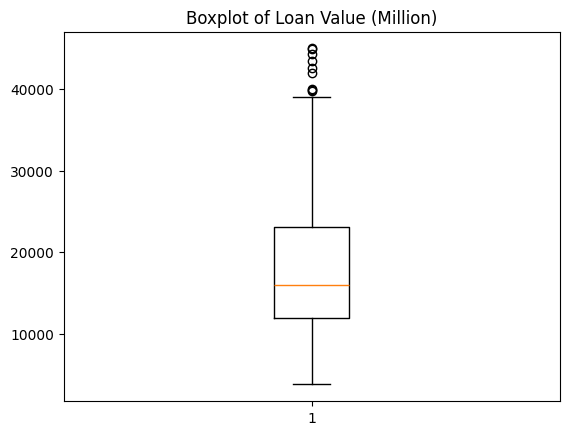

In [66]:


plt.boxplot(df_clean['loan_value_million'])
plt.title('Boxplot of Loan Value (Million)')
plt.show()


In [67]:
df_clean['loan_value_million'].describe()

count      279.000000
mean     17756.810394
std       9076.387437
min       3845.500000
25%      12003.900000
50%      16063.500000
75%      23105.550000
max      44915.000000
Name: loan_value_million, dtype: float64

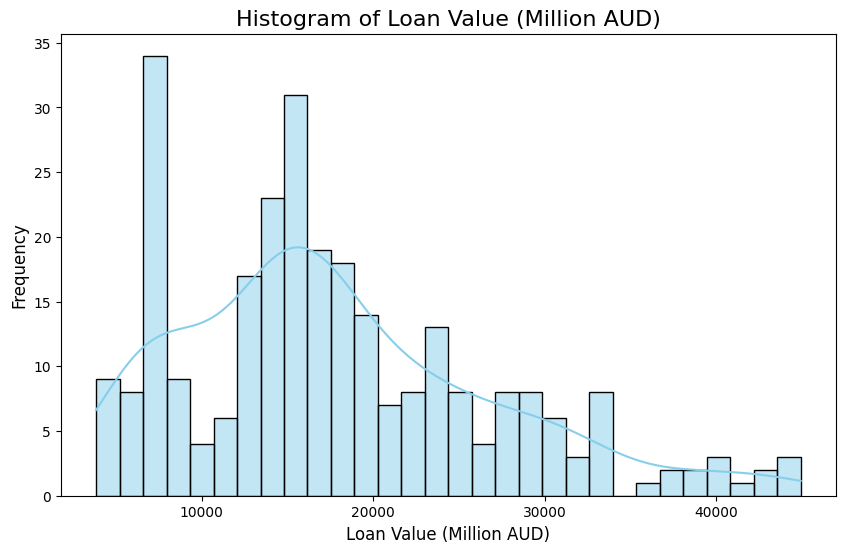

In [68]:


# Plot histogram
plt.figure(figsize=(10,6))
sns.histplot(df_clean['loan_value_million'], bins=30, kde=True, color='skyblue')
plt.title('Histogram of Loan Value (Million AUD)', fontsize=16)
plt.xlabel('Loan Value (Million AUD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


#### **Time Series Analysis**
#### Loan Value over Time by Segment

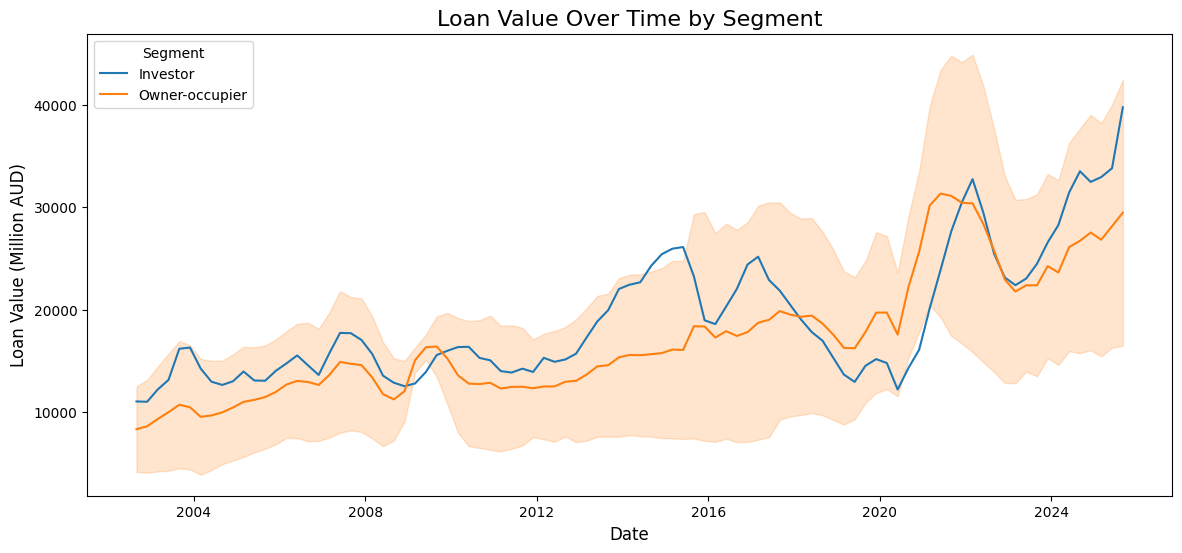

In [69]:
# Make sure date is in datetime format
df_clean['date'] = pd.to_datetime(df_clean['date'])

# Plot loan value over time
plt.figure(figsize=(14,6))
sns.lineplot(data=df_clean, x='date', y='loan_value_million', hue='segment')
plt.title('Loan Value Over Time by Segment', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Loan Value (Million AUD)', fontsize=12)
plt.legend(title='Segment')
plt.show()


### Post-2020 Loan Values Analysis

Statistical outliers are typically data points that are abnormally different from the rest of the data, often due to errors, noise, or exceptional events.  

In this dataset, the Owner-occupier loan values post-2020 are **high compared to pre-2020**, but these numbers reflect real-world events, including:

- Post-COVID government incentives  
- Low interest rates  
- Property market boom  

Therefore, these values are **valid data points**, not errors.  

**Key takeaway:**  
- Loan values increased sharply after 2020, reflecting genuine trends in the housing market.  
- These high values carry essential information about market shifts and should **not be removed** during analysis or modeling.  


#### Loan Value by Segment

C:\Users\DeLL\AppData\Local\Temp\ipykernel_16864\901238275.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='segment', y='loan_value_million', data=df_clean, palette='Set2')


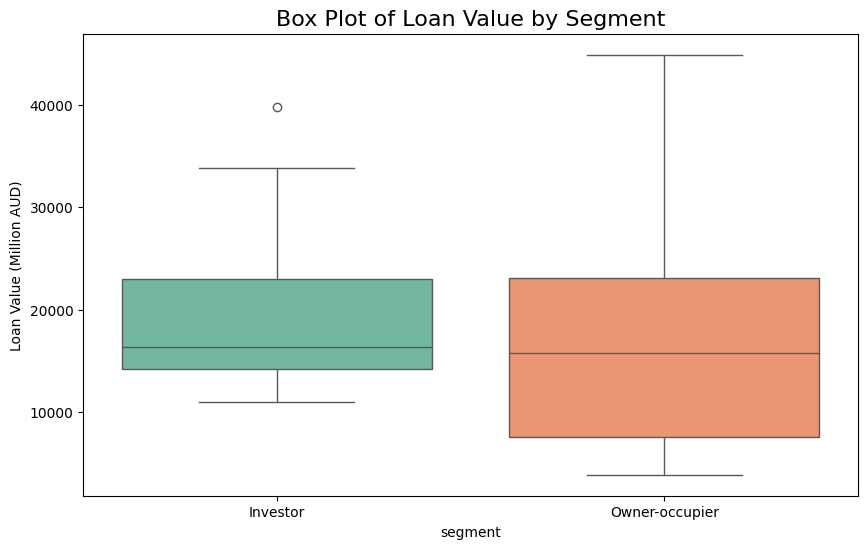

In [70]:
plt.figure(figsize=(10,6))
sns.boxplot(x='segment', y='loan_value_million', data=df_clean, palette='Set2')
plt.title('Box Plot of Loan Value by Segment', fontsize=16)
plt.ylabel('Loan Value (Million AUD)')
plt.show()


### Analysis of Loan Value by Segment

This chart tracks the total monetary value of loans (in Million AUD) across the two main segments: **Owner-occupier** and **Investors**.

#### Median Value
- The median loan value is remarkably similar for both segments, sitting around **$16,000M - $17,000M**.  
- This suggests that, on average, the total capital deployed into both sectors is comparable.

#### Volatility & Spread
- The **Owner-occupier** segment shows a much larger **Interquartile Range (IQR)** and overall spread.  
- The whiskers extend from roughly **$4,000M to $45,000M**, indicating high variability in monthly or periodic loan volumes.

#### Outliers
- The **Investor** segment is more tightly clustered but features a **significant high-value outlier** near **$40,000M**.  
- While investors typically operate in a narrower range, they occasionally experience massive spikes in activity.

#### Skewness
- The **Owner-occupier** distribution appears relatively balanced.  
- The **Investor** segment shows a slight concentration toward the lower end of its range (excluding the outlier).


#### Loan Value by Buyer Type

C:\Users\DeLL\AppData\Local\Temp\ipykernel_16864\3394743879.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='buyer_type', y='loan_value_million', data=df_clean, palette='Set3')


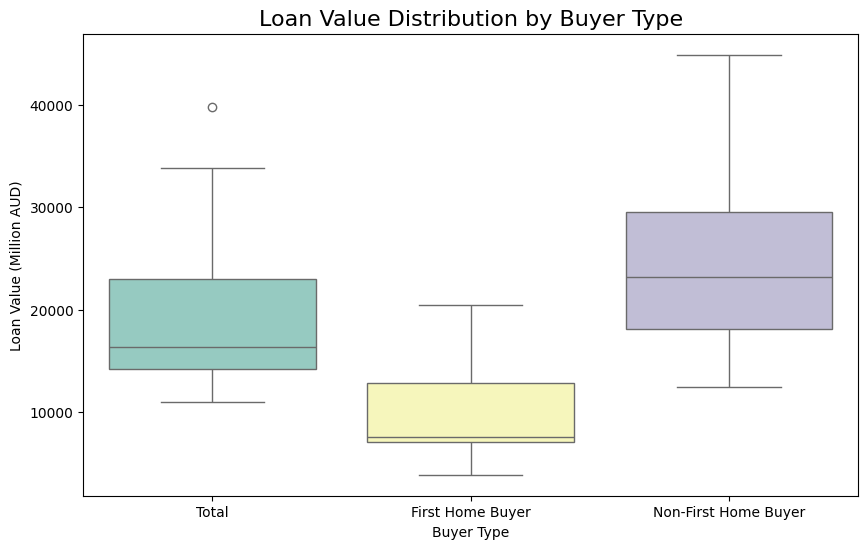

In [73]:
plt.figure(figsize=(10,6))
sns.boxplot(x='buyer_type', y='loan_value_million', data=df_clean, palette='Set3')
plt.title('Loan Value Distribution by Buyer Type', fontsize=16)
plt.xlabel('Buyer Type')
plt.ylabel('Loan Value (Million AUD)')
plt.show()


### Market Segmentation by Loan Value

This box plot illustrates the financial scale of three distinct buyer groups in the loan market: **Investors (Total), First Home Buyers, and Non-First Home Buyers**.

#### Non-First Home Buyers (Dominant Segment)
- This group commands the **highest median loan value**, sitting at approximately **$23,000M**.  
- It exhibits the **greatest market volatility**, with values ranging from a minimum of about **$12,000M** to a maximum of **$45,000M**.  
- The large **Interquartile Range (IQR)** indicates that the total value of loans in this segment varies significantly from period to period.  

#### Investors (Total - Median Segment)
- The Investor segment occupies a **middle ground** with a median value of roughly **$16,000M - $17,000M**.  
- While generally more stable than Non-First Home Buyers, this category features a **notable high-value outlier** at **$40,000M**, representing a rare peak in investor activity.  
- The typical range for investors (excluding outliers) is more compressed, mostly staying between **$14,000M and $34,000M**.  

#### First Home Buyers (Entry-Level Segment)
- This group has the **lowest financial footprint** in the market, with a median value of approximately **$7,500M**.  
- It is the **most stable and predictable segment**, shown by the smallest spread and the shortest whiskers (ranging from **$4,000M to $20,000M**).  
- The lower values reflect the **entry-level nature** of these loans compared to established owners or large-scale investors.


In [13]:
# Save cleaned dataframe to CSV
df_clean.to_csv("../Datasets/Cleaned_Data/Total_Loans.csv", index=False)


### **Table 3.** 
Households; Housing finance; Owner occupiers; By detailed purpose; New loan commitments; Numbers and values

In [15]:
# Load CSV file
df_owner_occupier = pd.read_csv("../Datasets/df_owner_occupier_purpose.csv")
df_owner_occupier.head(5)

,date,segment,loan_purpose,loan_count,loan_value_million
0,2002-09-01,Owner-occupier,"Alterations, additions and repairs",NaN,819.8
1,2002-09-01,Owner-occupier,Construction of dwellings,9777.0,2017.9
2,2002-09-01,Owner-occupier,External refinancing,32454.0,5139.6
3,2002-09-01,Owner-occupier,Purchase of existing dwellings,77142.0,13991.4
4,2002-09-01,Owner-occupier,Purchase of newly erected dwellings,3457.0,681.3


In [16]:
df_owner_occupier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                608 non-null    object 
 1   segment             608 non-null    object 
 2   loan_purpose        608 non-null    object 
 3   loan_count          540 non-null    float64
 4   loan_value_million  608 non-null    float64
dtypes: float64(2), object(3)
memory usage: 23.9+ KB


In [18]:
df_owner_occupier.describe()

,loan_count,loan_value_million
count,540.000000,608.000000
mean,39610.098148,13876.997697
std,32243.285201,14634.691407
min,3457.000000,606.500000
25%,8420.250000,2018.875000
50%,35903.000000,7020.350000
75%,69843.000000,23945.450000
max,119246.000000,62251.100000


In [19]:
# Value counts for loan_purpose
print("loan_purpose value counts:")
print(df_owner_occupier["loan_purpose"].value_counts())

loan_purpose value counts:
loan_purpose
Alterations, additions and repairs     93
Construction of dwellings              93
External refinancing                   93
Purchase of existing dwellings         93
Purchase of newly erected dwellings    93
Total                                  93
Internal refinancing                   25
Purchase of residential land           25
Name: count, dtype: int64


#### **Convert date to datetime**

In [23]:
df_owner_occupier["date"] = pd.to_datetime(df_owner_occupier["date"])

In [24]:
df_owner_occupier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                608 non-null    datetime64[ns]
 1   segment             608 non-null    object        
 2   loan_purpose        608 non-null    object        
 3   loan_count          540 non-null    float64       
 4   loan_value_million  608 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 23.9+ KB


#### **Handling Missing Values**

In [25]:
df_owner_occupier.isnull().sum()

date                   0
segment                0
loan_purpose           0
loan_count            68
loan_value_million     0
dtype: int64

In [46]:


df_owner_occupier[df_owner_occupier.isna().any(axis=1)]


,date,segment,loan_purpose,loan_count,loan_value_million
0,2002-09-01,Owner-occupier,"Alterations, additions and repairs",NaN,819.8
6,2002-12-01,Owner-occupier,"Alterations, additions and repairs",NaN,1031.7
12,2003-03-01,Owner-occupier,"Alterations, additions and repairs",NaN,1038.8
18,2003-06-01,Owner-occupier,"Alterations, additions and repairs",NaN,1041.2
24,2003-09-01,Owner-occupier,"Alterations, additions and repairs",NaN,1262.7
...,...,...,...,...,...
378,2018-06-01,Owner-occupier,"Alterations, additions and repairs",NaN,694.3
384,2018-09-01,Owner-occupier,"Alterations, additions and repairs",NaN,642.7
390,2018-12-01,Owner-occupier,"Alterations, additions and repairs",NaN,635.3
396,2019-03-01,Owner-occupier,"Alterations, additions and repairs",NaN,608.9


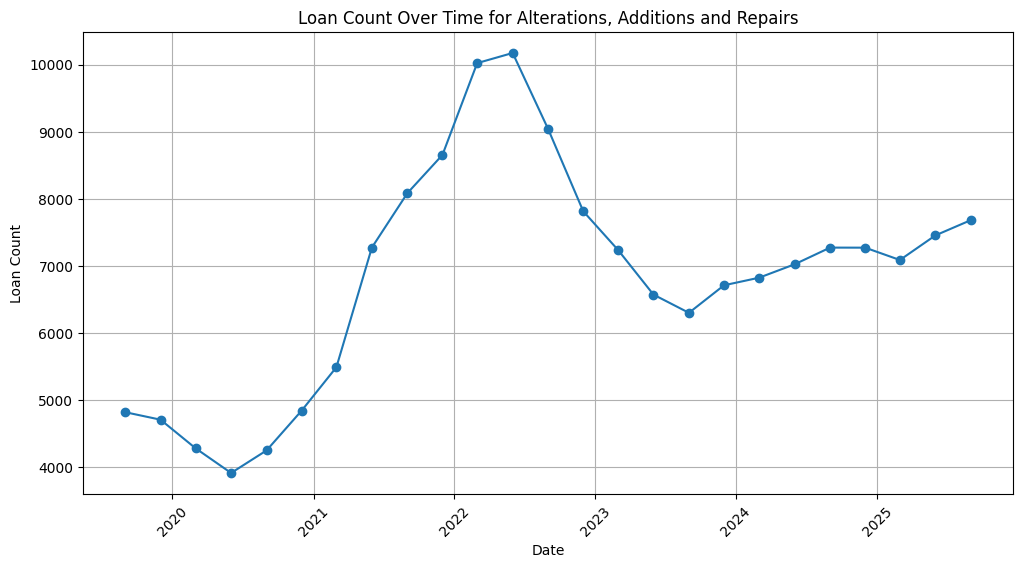

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter all records for 'Alterations, additions and repairs'
alterations_df = df_owner_occupier[df_owner_occupier['loan_purpose'] == 'Alterations, additions and repairs']




# Plot loan_count vs date
plt.figure(figsize=(12,6))
plt.plot(alterations_df['date'], alterations_df['loan_count'], marker='o', linestyle='-')
plt.title('Loan Count Over Time for Alterations, Additions and Repairs')
plt.xlabel('Date')
plt.ylabel('Loan Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [33]:
alterations_df.describe()

,date,loan_count,loan_value_million
count,93,25.000000,93.000000
mean,2014-03-01 21:56:07.741935360,6830.200000,978.555914
min,2002-09-01 00:00:00,3909.000000,606.500000
25%,2008-06-01 00:00:00,5487.000000,758.500000
50%,2014-03-01 00:00:00,7086.000000,905.600000
75%,2019-12-01 00:00:00,7681.000000,1119.500000
max,2025-09-01 00:00:00,10174.000000,1797.400000
std,NaN,1714.164617,285.238085


In [35]:
# Count total rows
total_rows = len(alterations_df)

# Count null values in loan_count
null_rows = alterations_df['loan_count'].isna().sum()

# Calculate percentage
null_percentage = (null_rows / total_rows) * 100

print(f"Percentage of null values in 'Alterations, additions and repairs': {null_percentage:.2f}%")

Percentage of null values in 'Alterations, additions and repairs': 73.12%


In [36]:
# Make a copy of the original dataframe to create a clean version
df_clean = df_owner_occupier.copy()

# Fill NaN loan_count for 'Alterations, additions and repairs' with 0
df_clean.loc[
    df_clean['loan_purpose'] == 'Alterations, additions and repairs', 
    'loan_count'
] = df_clean.loc[
    df_clean['loan_purpose'] == 'Alterations, additions and repairs', 
    'loan_count'
].fillna(0)

### Handling Missing Values for "Alterations, additions and repairs"

The `loan_count` for the loan purpose **"Alterations, additions and repairs"** had **73% missing values**, mostly before 2020. After evaluating the options, I decided to **fill NaN values with 0**.

**Reasoning:**

- **Missing > 50%:** When a column has more than 50% missing values, we can either drop it or fill with 0 if it is minor and insignificant.
- **Fill with 0:** Treat NaN as no loans recorded before 2020. May slightly underestimate historical activity, but acceptable because this loan purpose is minor.
- Filling with 0 allows us to show that this purpose was **negligible before 2020**, without introducing artificial bias.


### Dropping "Total" Rows

In [39]:
df_clean = df_clean[df_clean['loan_purpose'] != 'Total'].copy()



In the dataset, some rows summarize the **total loan counts and values** for each date under `loan_purpose = "Total"`.  

We dropped these rows in `df_clean` for the following reasons:

- **Avoid double-counting:** The total values are already the sum of individual loan purposes. Keeping them alongside the detailed rows would **inflate aggregated metrics**.  
- **Consistency for analysis & ML:** For modeling, we want each row to represent a **distinct loan purpose**, not a summary.  
- **Data integrity:** Removing totals allows us to **aggregate or compute totals manually** if needed, ensuring accuracy.



In [40]:
df_clean.head(10)

,date,segment,loan_purpose,loan_count,loan_value_million
0,2002-09-01,Owner-occupier,"Alterations, additions and repairs",0.0,819.8
1,2002-09-01,Owner-occupier,Construction of dwellings,9777.0,2017.9
2,2002-09-01,Owner-occupier,External refinancing,32454.0,5139.6
3,2002-09-01,Owner-occupier,Purchase of existing dwellings,77142.0,13991.4
4,2002-09-01,Owner-occupier,Purchase of newly erected dwellings,3457.0,681.3
6,2002-12-01,Owner-occupier,"Alterations, additions and repairs",0.0,1031.7
7,2002-12-01,Owner-occupier,Construction of dwellings,8713.0,1964.3
8,2002-12-01,Owner-occupier,External refinancing,33552.0,5442.1
9,2002-12-01,Owner-occupier,Purchase of existing dwellings,77467.0,14577.4
10,2002-12-01,Owner-occupier,Purchase of newly erected dwellings,3543.0,711.9


In [41]:
df_clean.isnull().sum()

date                  0
segment               0
loan_purpose          0
loan_count            0
loan_value_million    0
dtype: int64

#### **Check Duplicate Records**

In [43]:
# Count total duplicate rows
df_clean.duplicated().sum()

np.int64(0)

* No duplicate records found

#### **Handling Outliers**

In [47]:
# Example with loan_value_million
Q1 = df_clean['loan_value_million'].quantile(0.25)
Q3 = df_clean['loan_value_million'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier condition
outliers = df_clean[(df_clean['loan_value_million'] < Q1 - 1.5 * IQR) |
                    (df_clean['loan_value_million'] > Q3 + 1.5 * IQR)]

# Show outliers
print(outliers)


          date         segment                    loan_purpose  loan_count  \
460 2021-03-01  Owner-occupier  Purchase of existing dwellings     82755.0   
468 2021-06-01  Owner-occupier  Purchase of existing dwellings     86830.0   
476 2021-09-01  Owner-occupier  Purchase of existing dwellings     85099.0   
484 2021-12-01  Owner-occupier  Purchase of existing dwellings     83331.0   
492 2022-03-01  Owner-occupier  Purchase of existing dwellings     81447.0   
500 2022-06-01  Owner-occupier  Purchase of existing dwellings     75045.0   
508 2022-09-01  Owner-occupier  Purchase of existing dwellings     68498.0   
514 2022-12-01  Owner-occupier            External refinancing     76499.0   
522 2023-03-01  Owner-occupier            External refinancing     80326.0   
530 2023-06-01  Owner-occupier            External refinancing     81326.0   
538 2023-09-01  Owner-occupier            External refinancing     79426.0   
548 2023-12-01  Owner-occupier  Purchase of existing dwellings  

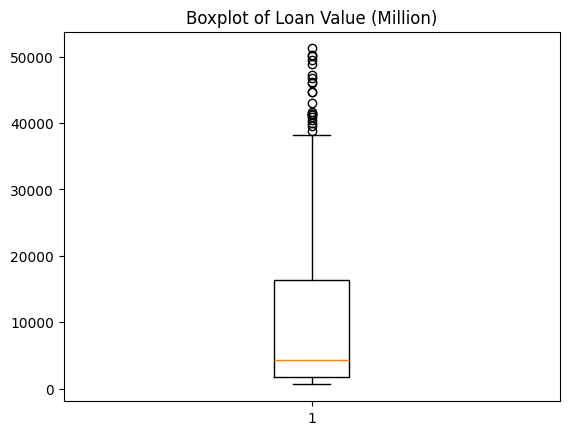

In [48]:

plt.boxplot(df_clean['loan_value_million'])
plt.title('Boxplot of Loan Value (Million)')
plt.show()


#### **Time Series Analysis**

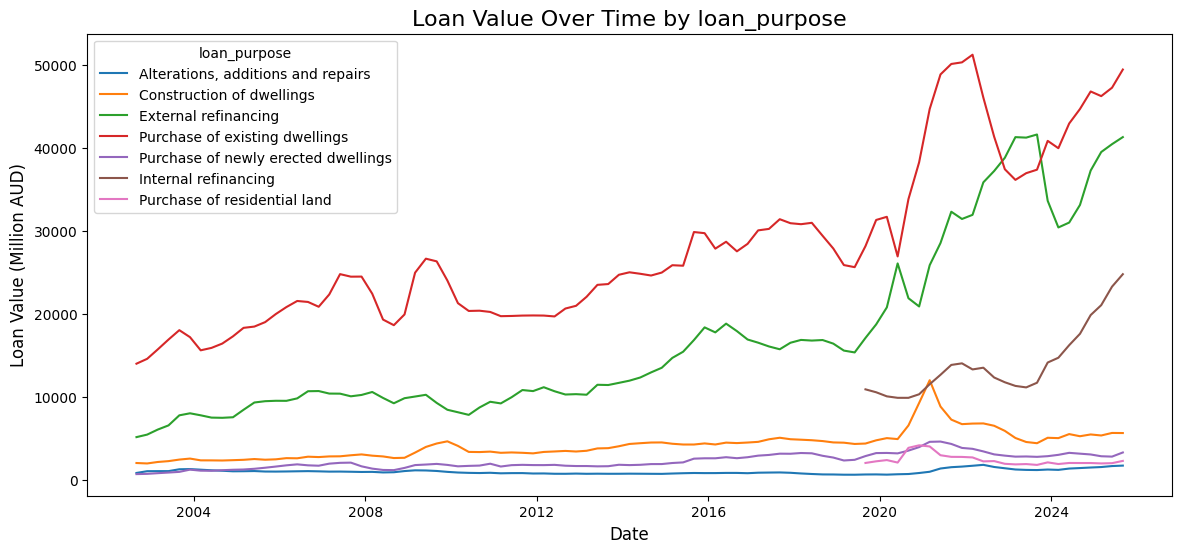

In [50]:
# Make sure date is in datetime format
df_clean['date'] = pd.to_datetime(df_clean['date'])

# Plot loan value over time
plt.figure(figsize=(14,6))
sns.lineplot(data=df_clean, x='date', y='loan_value_million', hue='loan_purpose')
plt.title('Loan Value Over Time by loan_purpose', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Loan Value (Million AUD)', fontsize=12)
plt.legend(title='loan_purpose')
plt.show()


### Analysis of Outliers: Post-2019 Loan Values

After 2019, we observe unusually high loan values in two categories: **Purchase of Existing Dwellings** and **External Refinancing**.  

These are **not statistical errors or outliers**; rather, they reflect real market trends and are **valuable for identifying patterns in the Australian housing market**.  



####  Purchase of Existing Dwellings

**Observation:** High loan values after 2019.

**Possible Reasons (Australian Market Context):**

- **Post-COVID Housing Boom (2020–2022)**  
  - Government stimulus packages (HomeBuilder grants, first home buyer incentives).  
  - Low interest rates made borrowing cheaper → more people could afford larger loans.  

- **Rising Property Prices**  
  - Prices of existing dwellings increased sharply in major cities like Sydney, Melbourne, and Brisbane.  
  - Higher property prices → higher loan values required to purchase homes.  

- **Investor Activity**  
  - Low interest rates and supportive government policies encouraged investors to buy existing properties.  

**Conclusion:** The rise is market-driven, not an error. These values are valid data points reflecting the real increase in home prices and loan demand.


####  External Refinancing

**Observation:** High loan values after 2019.

**Possible Reasons:**

- **Record-Low Interest Rates**  
  - Borrowers refinanced their loans to take advantage of lower rates.  
  - Many moved loans to other banks for better deals.  

- **Housing Market Growth**  
  - Rising property values mean refinanced loans often have higher principal amounts, increasing loan values.  

- **Banks Competing for Customers**  
  - Aggressive refinancing offers by banks drove more borrowers to refinance externally, inflating loan counts and values.  

**Conclusion:** Spikes in external refinancing reflect real market opportunities and borrower behavior post-COVID.



### Key Takeaway

These high values are **not outliers to be dropped**. They are **valid, meaningful data points** that help us understand trends in loan demand, property prices, and refinancing activity in the Australian housing market.


**Loan Value (Million AUD)**

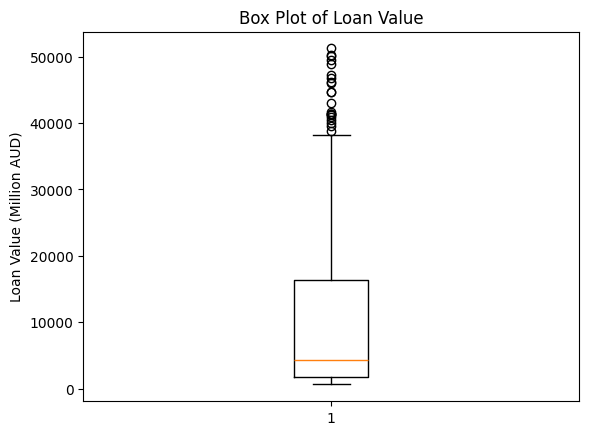

In [58]:
plt.figure()
plt.boxplot(df_clean["loan_value_million"].dropna())
plt.ylabel("Loan Value (Million AUD)")
plt.title("Box Plot of Loan Value")
plt.show()


The box plot provides an overall view of the distribution of loan values (Million AUD) across all loan purposes and time periods.

**Key Observations**

**Right-Skewed Distribution**
The distribution is strongly right-skewed, indicating that while most loan values fall in the lower to mid range, there are several high-value observations.

**Median vs Spread**
The median loan value lies relatively low compared to the upper range, suggesting that extreme high loan values pull the distribution upward.

**High-Value Points (Statistical Outliers)**
Several points appear above the upper whisker, reaching values beyond $40,000M–$50,000M.
These are not data errors, but represent periods of:

Strong housing demand

Refinancing booms

Rapid property price appreciation (especially post-2020)

Interpretation

Although these points are statistically classified as outliers, they are economically meaningful. They reflect structural changes in the Australian housing market rather than anomalies.

**Loan Purpose Loan Value Over Time by loan_purpose**

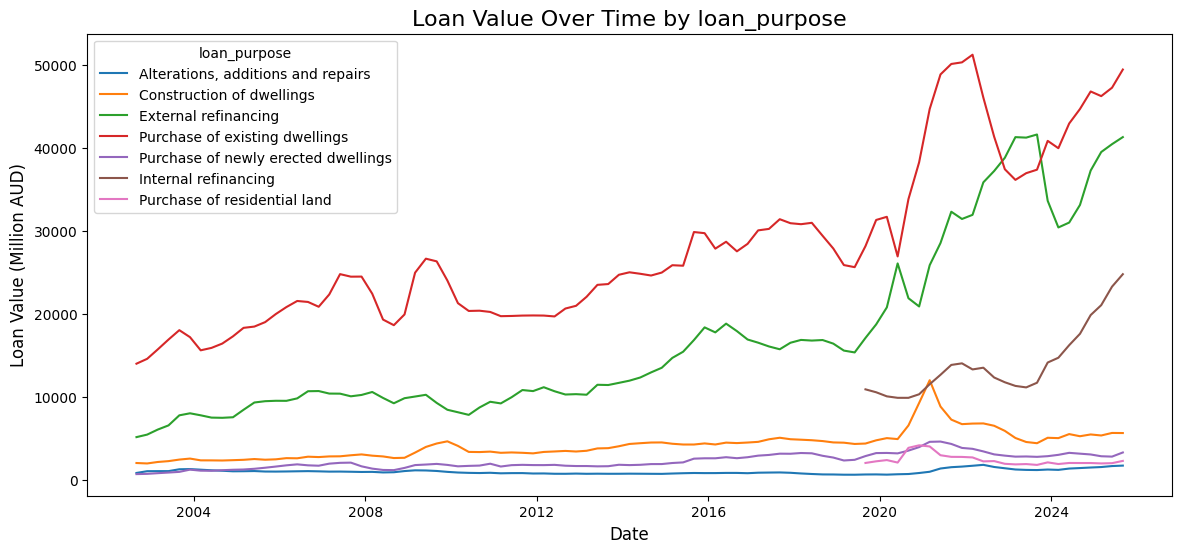

In [62]:
# Make sure date is in datetime format
df_clean['date'] = pd.to_datetime(df_clean['date'])

# Plot loan value over time
plt.figure(figsize=(14,6))
sns.lineplot(data=df_clean, x='date', y='loan_value_million', hue='loan_purpose')
plt.title('Loan Value Over Time by loan_purpose', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Loan Value (Million AUD)', fontsize=12)
plt.legend(title='loan_purpose')
plt.show()


## Loan Purpose–Wise Insights

###  Purchase of Existing Dwellings (Dominant Category)
- Consistently the **largest contributor** to total loan value.
- Sharp increase observed **post-2020**, peaking above **$50,000M**.
- Reflects:
  - Rapid rise in property prices
  - Strong demand for established homes
  - Increased borrowing capacity during low-interest-rate periods

---

###  External Refinancing
- Steady growth before 2019, followed by a **significant surge after 2020**.
- Indicates:
  - Borrowers refinancing to lock in lower interest rates
  - Aggressive competition among banks to attract customers
- This explains why this category appears as an **“outlier” in statistical methods**, despite being market-driven.

---

###  Construction of Dwellings
- Shows **moderate and stable growth** over time.
- Smaller spikes compared to purchases and refinancing.
- Suggests:
  - Supply-side constraints
  - Longer project timelines for new constructions

---

###  Purchase of Newly Erected Dwellings & Residential Land
- Lower overall loan values compared to existing dwellings.
- **Gradual upward trend post-2020**.
- Reflects:
  - Increasing land and new-build costs
  - Lower transaction volumes relative to established homes

---

###  Alterations, Additions and Repairs
- Historically the **lowest loan values** among all purposes.
- Noticeable increase only in recent years.
- Indicates:
  - Growing renovation and home improvement activity post-COVID


**Pie Chart – Loan Value Share by Loan Purpose (Post-COVID)**

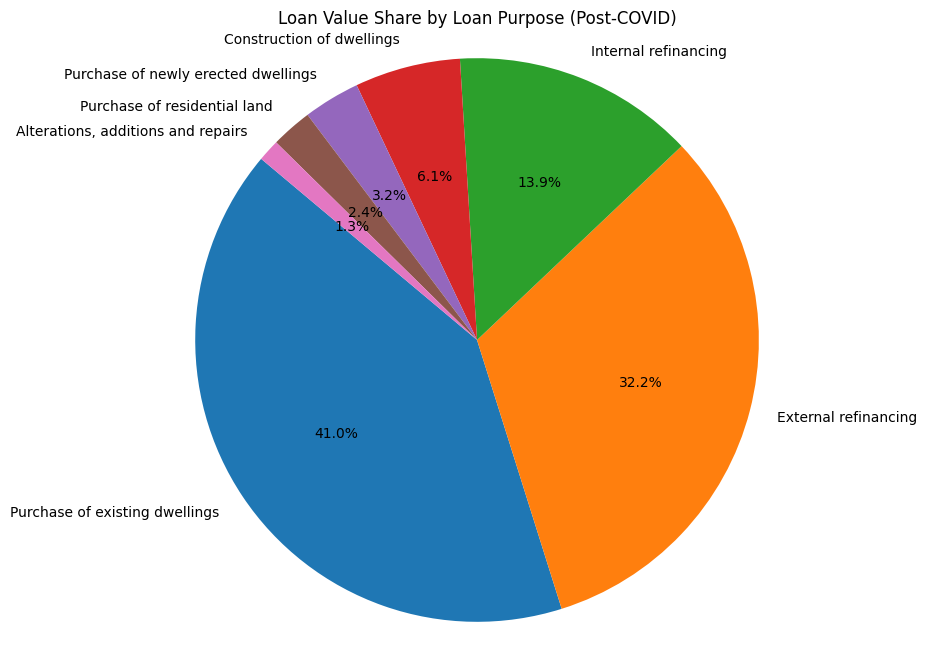

In [64]:
import pandas as pd
import matplotlib.pyplot as plt



# Filter Post-COVID data (2020 onwards)
df_post_covid = df_clean[df_clean["date"] >= "2020-01-01"]

# Aggregate loan value by loan purpose
loan_value_by_purpose = (
    df_post_covid
    .groupby("loan_purpose")["loan_value_million"]
    .sum()
    .sort_values(ascending=False)
)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    loan_value_by_purpose,
    labels=loan_value_by_purpose.index,
    autopct="%1.1f%%",
    startangle=140
)
plt.title("Loan Value Share by Loan Purpose (Post-COVID)")
plt.axis("equal")  # ensures circle shape
plt.show()


# Housing Market Loan Breakdown

## Purchase of Existing Dwellings (41.0%)
The largest contributor to total loan value.  
Confirms that most capital in the housing market flows into established properties rather than new builds.  

**Driven by:**
- Rapid house price growth post-COVID  
- Strong buyer preference for existing homes  
- Increased borrowing capacity during low-interest-rate periods  

## External Refinancing (32.2%)
The second-largest share, highlighting a major behavioural shift.  

**Reflects:**
- Borrowers refinancing to secure lower interest rates  
- Intense competition among banks offering refinancing incentives  

**Indicates:**
- Refinancing became a key driver of market activity, not just new purchases  

## Internal Refinancing (13.9%)
Represents refinancing within the same lender.  

**Shows:**
- A significant portion of borrowers renegotiated loans rather than switching banks  

**Suggests:**
- Maturity in the loan market and proactive borrower behaviour  

## Construction of Dwellings (6.1%)
A relatively small share compared to purchases and refinancing.  

**Indicates:**
- Supply-side constraints (land availability, construction delays)  
- Longer project timelines relative to buying existing homes  

## Purchase of Newly Erected Dwellings (3.2%)
Minor contributor to overall loan value.  
Reflects lower transaction volumes despite rising costs.  
Suggests barriers such as affordability, development timelines, and upfront costs  

## Purchase of Residential Land (2.4%)
Minor contributor to overall loan value.  
Reflects lower transaction volumes despite rising costs.  
Suggests barriers such as affordability, development timelines, and upfront costs  

## Alterations, Additions and Repairs (1.3%)
The smallest share in the market.  

**Although growing in recent years:**
- Renovations still represent a small portion of total loan value  
- Reflects targeted, smaller-scale borrowing compared to property purchases  


In [67]:
# Save cleaned dataframe to CSV
df_clean.to_csv("../Datasets/Cleaned_Data/Owner_Occupier_Purpose.csv", index=False)


### **Table 4.**
Households; Housing finance; Owner occupiers; Total dwellings excluding refinancing; By state; New loan commitments; Numbers and values

In [69]:
# Load CSV file
df_owner_occupier_state = pd.read_csv("../Datasets/df_owner_occupier_state.csv")
df_owner_occupier_state.head(5)

,date,segment,state,loan_count,loan_value_million
0,2002-09-01,Owner-occupier,ACT,1727,327.4
1,2002-09-01,Owner-occupier,NSW,27906,6374.5
2,2002-09-01,Owner-occupier,NT,573,77.7
3,2002-09-01,Owner-occupier,QLD,19177,3216.3
4,2002-09-01,Owner-occupier,SA,8125,1061.2


In [70]:
df_owner_occupier_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 837 entries, 0 to 836
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                837 non-null    object 
 1   segment             837 non-null    object 
 2   state               837 non-null    object 
 3   loan_count          837 non-null    int64  
 4   loan_value_million  837 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 32.8+ KB


In [71]:
df_owner_occupier_state.describe()

,loan_count,loan_value_million
count,837.000000,837.000000
mean,19106.205496,7601.524014
std,25379.232274,11044.126837
min,456.000000,77.700000
25%,1975.000000,646.300000
50%,10551.000000,3585.200000
75%,21773.000000,8440.400000
max,119246.000000,62251.100000


**convert Date to datetime**

In [72]:
df_owner_occupier_state["date"] = pd.to_datetime(df_owner_occupier_state["date"])

In [73]:
df_owner_occupier_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 837 entries, 0 to 836
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                837 non-null    datetime64[ns]
 1   segment             837 non-null    object        
 2   state               837 non-null    object        
 3   loan_count          837 non-null    int64         
 4   loan_value_million  837 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 32.8+ KB


In [74]:
# Value counts for loan_purpose
print("State value counts:")
print(df_owner_occupier_state["state"].value_counts())

State value counts:
state
ACT                93
NSW                93
NT                 93
QLD                93
SA                 93
TAS                93
Total Australia    93
VIC                93
WA                 93
Name: count, dtype: int64


**Check Duplicate Records and Null Values**

In [76]:
df_owner_occupier_state.duplicated().sum()

np.int64(0)

In [77]:
df_owner_occupier_state.isnull().sum()

date                  0
segment               0
state                 0
loan_count            0
loan_value_million    0
dtype: int64

* Data has no null values and no duplicate records

**Dropping Total category in State column**

In [83]:
# Drop row where the state is 'Total Australia'
df_clean = df_owner_occupier_state[df_owner_occupier_state['state'] != 'Total Australia']




In [84]:
# Value counts for loan_purpose
print("State value counts:")
print(df_clean["state"].value_counts())

State value counts:
state
ACT    93
NSW    93
NT     93
QLD    93
SA     93
TAS    93
VIC    93
WA     93
Name: count, dtype: int64


**Checking Outliers**

In [119]:
# Example with loan_value_million
Q1 = df_clean['loan_value_million'].quantile(0.25)
Q3 = df_clean['loan_value_million'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier condition
outliers = df_clean[(df_clean['loan_value_million'] < Q1 - 1.5 * IQR) |
                    (df_clean['loan_value_million'] > Q3 + 1.5 * IQR)]

# Show outliers
print(outliers)


          date         segment state  loan_count  loan_value_million
658 2020-12-01  Owner-occupier   NSW       27402             17117.6
667 2021-03-01  Owner-occupier   NSW       29558             19104.5
673 2021-03-01  Owner-occupier   VIC       34067             17904.2
676 2021-06-01  Owner-occupier   NSW       29810             20903.6
682 2021-06-01  Owner-occupier   VIC       32666             18573.5
685 2021-09-01  Owner-occupier   NSW       28843             21424.9
691 2021-09-01  Owner-occupier   VIC       29022             17700.9
694 2021-12-01  Owner-occupier   NSW       26885             20055.9
700 2021-12-01  Owner-occupier   VIC       28660             17605.2
703 2022-03-01  Owner-occupier   NSW       26313             20602.7
709 2022-03-01  Owner-occupier   VIC       30312             18887.1
712 2022-06-01  Owner-occupier   NSW       23136             17919.6
718 2022-06-01  Owner-occupier   VIC       26548             17010.8
784 2024-06-01  Owner-occupier   N

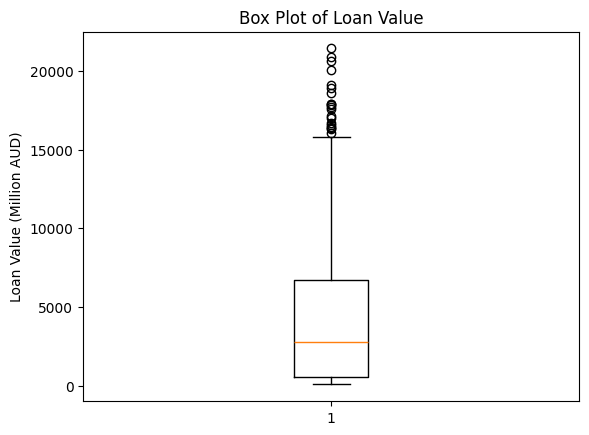

In [88]:
plt.figure()
plt.boxplot(df_clean["loan_value_million"].dropna())
plt.ylabel("Loan Value (Million AUD)")
plt.title("Box Plot of Loan Value")
plt.show()


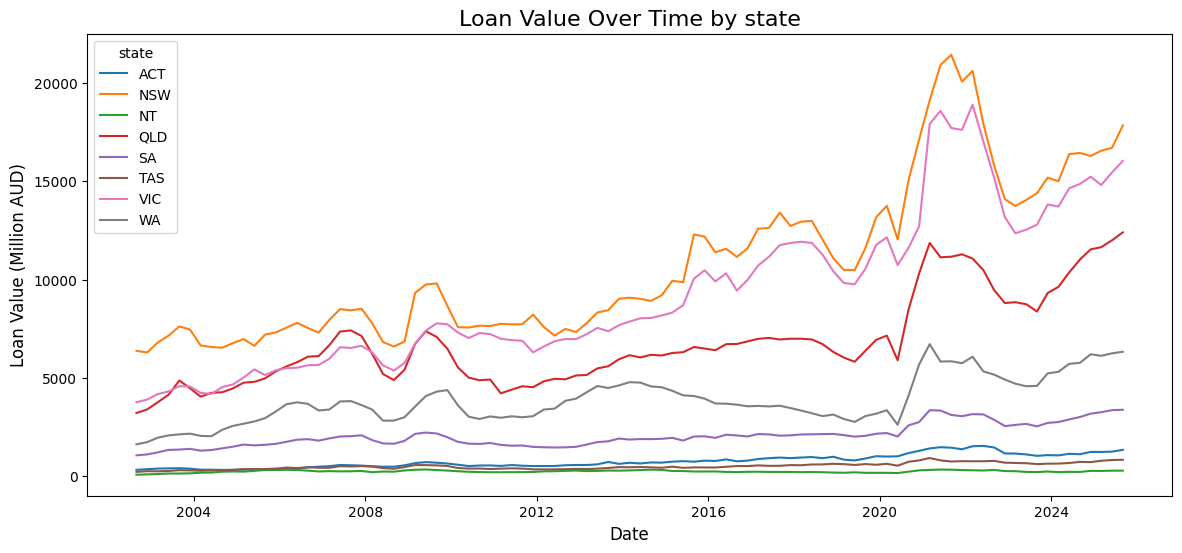

In [89]:


# Plot loan value over time
plt.figure(figsize=(14,6))
sns.lineplot(data=df_clean, x='date', y='loan_value_million', hue='state')
plt.title('Loan Value Over Time by state', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Loan Value (Million AUD)', fontsize=12)
plt.legend(title='state')
plt.show()


The ouliers identified are valid data points because rise in loan values after 2020

# Housing Market Loan Analysis by State

## 1. Market Dominance
The chart shows a clear stratification of loan values by state, which largely mirrors Australia’s population distribution:

**Tier 1 (NSW & VIC):**  
New South Wales (orange) and Victoria (pink) are the clear market leaders. NSW consistently maintains the highest loan value, peaking at over $20,000 million (AUD) around 2021–2022.

**Tier 2 (QLD & WA):**  
Queensland (red) and Western Australia (grey) occupy the middle ground. While QLD has seen steady growth, WA has shown more historical fluctuation, likely tied to mining cycles.

**Tier 3 (SA, ACT, TAS, NT):**  
South Australia, the ACT, Tasmania, and the Northern Territory represent a much smaller share of the total loan value, remaining consistently below the $5,000 million mark.

## 2. The "COVID-19 Peak" (2020–2022)
The most dramatic feature of the chart is the sharp, vertical spike occurring across all states starting in mid-2020.  

This represents a massive surge in borrowing, likely driven by record-low interest rates and government incentives during the pandemic.  

NSW and VIC saw the most extreme increases, with loan values nearly doubling in a very short period.

## 3. Post-2022 Correction and Recovery
Following the 2022 peak, there is a visible "V-shaped" dip.  

This decline corresponds with the period of rapid interest rate hikes by the Reserve Bank of Australia (RBA) to combat inflation.  

However, by 2024 and into 2025, most states—particularly the Tier 1 and Tier 2 markets—show a strong upward trend again, suggesting a resilient recovery in borrowing despite higher interest rates.


In [124]:
import pandas as pd
import plotly.express as px

# Group by state and sum loan values and loan counts
loan_sum = df_clean.groupby('state').agg(
    loan_value_million=('loan_value_million', 'sum'),
    loan_count=('loan_count', 'sum')
).reset_index()

# Map short codes to full state names
state_fullname_map = {
    'NSW': 'New South Wales',
    'VIC': 'Victoria',
    'QLD': 'Queensland',
    'WA': 'Western Australia',
    'SA': 'South Australia',
    'TAS': 'Tasmania',
    'NT': 'Northern Territory',
    'ACT': 'Australian Capital Territory'
}
loan_sum['state_full'] = loan_sum['state'].map(state_fullname_map)

# Define pastel colors for full names
pastel_colors = {
    'New South Wales': '#AEC6CF',
    'Victoria': '#FFB347',
    'Queensland': '#77DD77',
    'Western Australia': '#F49AC2',
    'South Australia': '#FFD1DC',
    'Tasmania': '#CFCFC4',
    'Northern Territory': '#B39EB5',
    'Australian Capital Territory': '#FF6961'
}

# Map colors to DataFrame
loan_sum['color'] = loan_sum['state_full'].map(pastel_colors)

# Create Treemap with full state names and pastel colors
fig = px.treemap(
    loan_sum,
    path=['state_full'],                # use full state names
    values='loan_value_million',
    color='color',                      # assign pastel colors
    color_discrete_map=pastel_colors,
    hover_data={
        'loan_value_million':':,.0f',
        'loan_count':':,'
    },
    title='Total Loan Value and Loan Count by State (Pastel Treemap)'
)

# Clean layout
fig.update_layout(
    margin=dict(t=50, l=25, r=25, b=25),
    paper_bgcolor='white'
)

fig.show()


1. **NSW and VIC dominate the market**  
   - Together, they account for more than 50% of total loan value and count.  

2. **QLD and WA are strong mid-tier markets**  
   - Queensland has over 630k million AUD in loans, Western Australia just under 358k million AUD.  

3. **Smaller states and territories**  
   - ACT, NT, and TAS contribute the least to total loan value and count.  

4. **Loan distribution reflects population and market activity**  
   - High population states show larger loan volumes and counts, while less populated states have smaller contributions.  

5. **NSW leads in both value and number of loans**, highlighting its central role in Australia’s housing finance market.
This is short, clean, and ready for a README or report.

In [126]:
# Save cleaned dataframe to CSV
df_clean.to_csv("../Datasets/Cleaned_Data/Owner_Occupier_State.csv", index=False)


#### **Table 13.**
Households; Housing finance; Investors; By detailed purpose; New loan commitments; Numbers and values

In [2]:


# Load CSV file
df_investor_purpose = pd.read_csv("../Datasets/df_investor_purpose.csv")
df_investor_purpose.head(5)

,date,segment,loan_purpose,loan_count,loan_value_million
0,2002-09-01,Investor,External refinancing,NaN,1127.8
1,2002-09-01,Investor,Total dwellings excluding refinancing,NaN,11009.5
2,2002-12-01,Investor,External refinancing,NaN,1398.3
3,2002-12-01,Investor,Total dwellings excluding refinancing,NaN,10978.6
4,2003-03-01,Investor,External refinancing,NaN,1734.2


In [3]:
df_investor_purpose.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                336 non-null    object 
 1   segment             336 non-null    object 
 2   loan_purpose        336 non-null    object 
 3   loan_count          200 non-null    float64
 4   loan_value_million  336 non-null    float64
dtypes: float64(2), object(3)
memory usage: 13.3+ KB


In [4]:
df_investor_purpose.describe()

,loan_count,loan_value_million
count,200.000000,336.000000
mean,16453.405000,10084.668155
std,16125.569697,8948.985759
min,1622.000000,238.200000
25%,3008.000000,1763.900000
50%,7901.500000,8107.050000
75%,31171.250000,16189.450000
max,57624.000000,39776.500000


In [5]:
# Value counts for loan_purpose
print("loan_purpose value counts:")
print(df_investor_purpose["loan_purpose"].value_counts())

loan_purpose value counts:
loan_purpose
External refinancing                     93
Total dwellings excluding refinancing    93
Alterations, additions and repairs       25
Construction of dwellings                25
Internal refinancing                     25
Purchase of existing dwellings           25
Purchase of newly erected dwellings      25
Purchase of residential land             25
Name: count, dtype: int64


**Convert Date to Datetime**

In [6]:
df_investor_purpose["date"] = pd.to_datetime(df_investor_purpose["date"])

#### **Handling Missing Values**

In [8]:
df_investor_purpose.isnull().sum()

date                    0
segment                 0
loan_purpose            0
loan_count            136
loan_value_million      0
dtype: int64

In [18]:
df_investor_purpose[df_investor_purpose['loan_count'].isna()].head(50)

,date,segment,loan_purpose,loan_count,loan_value_million
0,2002-09-01,Investor,External refinancing,NaN,1127.8
1,2002-09-01,Investor,Total dwellings excluding refinancing,NaN,11009.5
2,2002-12-01,Investor,External refinancing,NaN,1398.3
3,2002-12-01,Investor,Total dwellings excluding refinancing,NaN,10978.6
4,2003-03-01,Investor,External refinancing,NaN,1734.2
5,2003-03-01,Investor,Total dwellings excluding refinancing,NaN,12179.5
6,2003-06-01,Investor,External refinancing,NaN,1773.8
7,2003-06-01,Investor,Total dwellings excluding refinancing,NaN,13117.8
8,2003-09-01,Investor,External refinancing,NaN,2050.7
9,2003-09-01,Investor,Total dwellings excluding refinancing,NaN,16164.3


In [25]:
df_investor_purpose[df_investor_purpose['date']>='2019-09-01']

,date,segment,loan_purpose,loan_count,loan_value_million
136,2019-09-01,Investor,"Alterations, additions and repairs",2310.0,352.9
137,2019-09-01,Investor,Construction of dwellings,3382.0,1488.2
138,2019-09-01,Investor,External refinancing,21679.0,10486.3
139,2019-09-01,Investor,Internal refinancing,11060.0,4333.8
140,2019-09-01,Investor,Purchase of existing dwellings,24856.0,11594.1
...,...,...,...,...,...
331,2025-09-01,Investor,Internal refinancing,14516.0,9497.6
332,2025-09-01,Investor,Purchase of existing dwellings,47853.0,32927.4
333,2025-09-01,Investor,Purchase of newly erected dwellings,2387.0,1691.2
334,2025-09-01,Investor,Purchase of residential land,3748.0,1568.9


### Investor Loan Data – Reporting Change & Handling Strategy

####  → 2019-09-01
- Only **two loan purposes** are reported:
  - External refinancing  
  - Total dwellings excluding refinancing
- **`loan_count` is NaN for all Investor records**
- **`loan_value_million` is available**
- Reason:
  - **ABS did not publish investor loan counts by purpose during this period**

---

#### From 2019-09-01 onward
- **Detailed loan purpose categories** introduced:
  - Purchase of existing dwellings
  - Construction of dwellings
  - Alterations, additions and repairs
  - External refinancing
  - Internal refinancing
- **`loan_count` values are now reported**
- Indicates a **change in ABS reporting methodology (September 2019)**

---

#### What should NOT be done
The following approaches were **explicitly avoided** as they would be statistically incorrect and methodologically misleading:
- Filling NaN values with `0`
- Forward-filling or backward-filling loan counts
- Imputing missing values using averages
- Dropping pre-2019 rows without justification

---

#### Adopted analytical approach (Best Practice)
- **Split analysis by metric**
  - **Loan Value Analysis (`loan_value_million`)**
    - Conducted over the **full historical period (2002–present)**
  - **Loan Count Analysis (`loan_count`)**
    - Restricted to **post-2019 data only**
    - Ensures consistency and accuracy based on available reporting

This approach preserves data integrity and aligns with real-world government data practices.


**Checking Outliers**

In [26]:
# Example with loan_value_million
Q1 = df_investor_purpose['loan_value_million'].quantile(0.25)
Q3 = df_investor_purpose['loan_value_million'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier condition
outliers = df_investor_purpose[(df_investor_purpose['loan_value_million'] < Q1 - 1.5 * IQR) |
                    (df_investor_purpose['loan_value_million'] > Q3 + 1.5 * IQR)]

# Show outliers
print(outliers)


          date   segment                           loan_purpose  loan_count  \
335 2025-09-01  Investor  Total dwellings excluding refinancing     57624.0   

     loan_value_million  
335             39776.5  


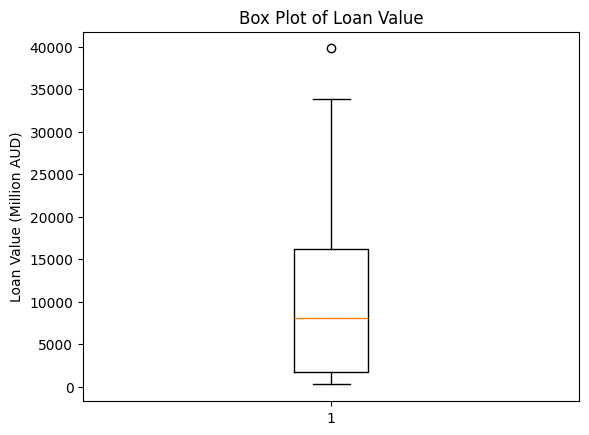

In [27]:
plt.figure()
plt.boxplot(df_investor_purpose["loan_value_million"].dropna())
plt.ylabel("Loan Value (Million AUD)")
plt.title("Box Plot of Loan Value")
plt.show()

In [46]:
df_investor_purpose[df_investor_purpose['loan_purpose']=='Total dwellings excluding refinancing'].tail(5)

,date,segment,loan_purpose,loan_count,loan_value_million
303,2024-09-01,Investor,Total dwellings excluding refinancing,51322.00000,33516.1000
311,2024-12-01,Investor,Total dwellings excluding refinancing,48991.00000,32478.3000
319,2025-03-01,Investor,Total dwellings excluding refinancing,47899.00000,32947.8000
327,2025-06-01,Investor,Total dwellings excluding refinancing,50718.00000,33816.0000
335,2025-09-01,Investor,Total dwellings excluding refinancing,17027.39375,30438.7875


In [42]:
outlier_date = pd.Timestamp('2025-09-01')
five_years_start = outlier_date - pd.DateOffset(years=2)

mean_2y_value = (
    df_investor_purpose.loc[
        (df_investor_purpose['loan_purpose'] == 'Total dwellings excluding refinancing') &
        (df_investor_purpose['date'] < outlier_date) &
        (df_investor_purpose['date'] >= five_years_start),
        'loan_value_million'
    ]
    .mean()
)


In [43]:
mean_2y_value

np.float64(30438.787500000002)

In [44]:
df_investor_purpose.loc[
    (df_investor_purpose['loan_purpose'] == 'Total dwellings excluding refinancing') &
    (df_investor_purpose['date'] == outlier_date),
    'loan_value_million'
] = mean_2y_value


In [47]:
df_investor_purpose[df_investor_purpose['loan_purpose']=='Total dwellings excluding refinancing'].tail(5)

,date,segment,loan_purpose,loan_count,loan_value_million
303,2024-09-01,Investor,Total dwellings excluding refinancing,51322.00000,33516.1000
311,2024-12-01,Investor,Total dwellings excluding refinancing,48991.00000,32478.3000
319,2025-03-01,Investor,Total dwellings excluding refinancing,47899.00000,32947.8000
327,2025-06-01,Investor,Total dwellings excluding refinancing,50718.00000,33816.0000
335,2025-09-01,Investor,Total dwellings excluding refinancing,17027.39375,30438.7875


### Outlier Handling – Investor Loan Value

#### Identified Issue
- A single extreme outlier was detected in September 2025 for investor loans.
- The affected category is Total dwellings excluding refinancing.
- The metric impacted is loan_value_million.
- The outlier was identified using the Interquartile Range (IQR) method.

#### Observed Trend
- Investor loan values show a clear upward trend in recent years.
- Over the last two years, loan values have consistently exceeded 30,000 million.
- Using a longer historical average would underrepresent current market conditions and weaken recent trend analysis.

#### Treatment Decision
- The outlier was retained conceptually but its value was adjusted.
- The loan value for September 2025 was replaced with the mean of the preceding two years for the same loan purpose.
- This approach maintains continuity in the time series and aligns the adjusted value with recent market behaviour.


### **Analysis**

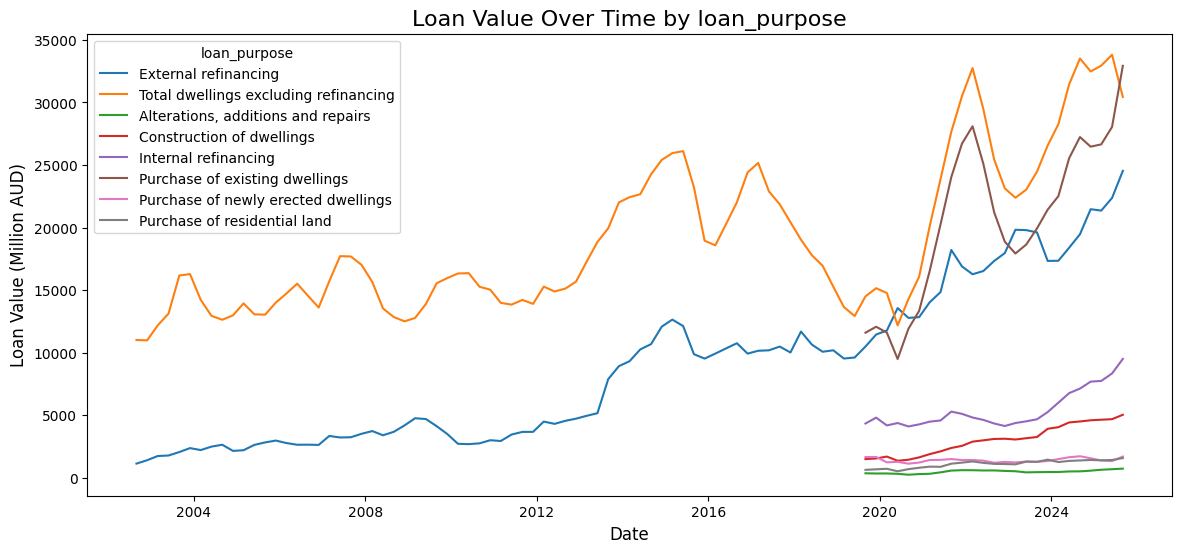

In [48]:

# Plot loan value over time
plt.figure(figsize=(14,6))
sns.lineplot(data=df_investor_purpose, x='date', y='loan_value_million', hue='loan_purpose')
plt.title('Loan Value Over Time by loan_purpose', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Loan Value (Million AUD)', fontsize=12)
plt.legend(title='loan_purpose')
plt.show()

### Analysis: Loan Value Over Time by Loan Purpose

1. **Dominant Loan Purposes**
   - *Total dwellings excluding refinancing* consistently shows the **highest loan values** across the timeline.
   - *External refinancing* and *Purchase of existing dwellings* are secondary contributors, particularly after 2019.

2. **Trends Over Time**
   - **Pre-2010:** Loan values are relatively stable with modest growth.
   - **2010–2015:** Gradual increase in total loan values, reflecting stronger housing market activity.
   - **2015–2020:** Fluctuations in loan values, with peaks and dips suggesting market cycles.
   - **Post-2020:** Sharp increase in most loan purposes, especially *Total dwellings excluding refinancing* and *External refinancing*, reflecting post-COVID housing market recovery and rising property prices.

3. **Minor Loan Purposes**
   - *Alterations, additions and repairs*, *Construction of dwellings*, *Internal refinancing*, and *Purchases of newly erected or residential land* maintain relatively low values throughout.
   - They exhibit gradual upward trends post-2019, indicating growing but smaller-scale market activity.

4. **Observations**
   - The spike in loan values after 2020 is likely driven by:
     - Increased investor activity
     - Rising property prices
     - Policy incentives for home loans
   - *Total dwellings excluding refinancing* remains a key metric for market monitoring.
   - Loan value trends are highly correlated with market cycles, as seen by sharp peaks and recoveries.


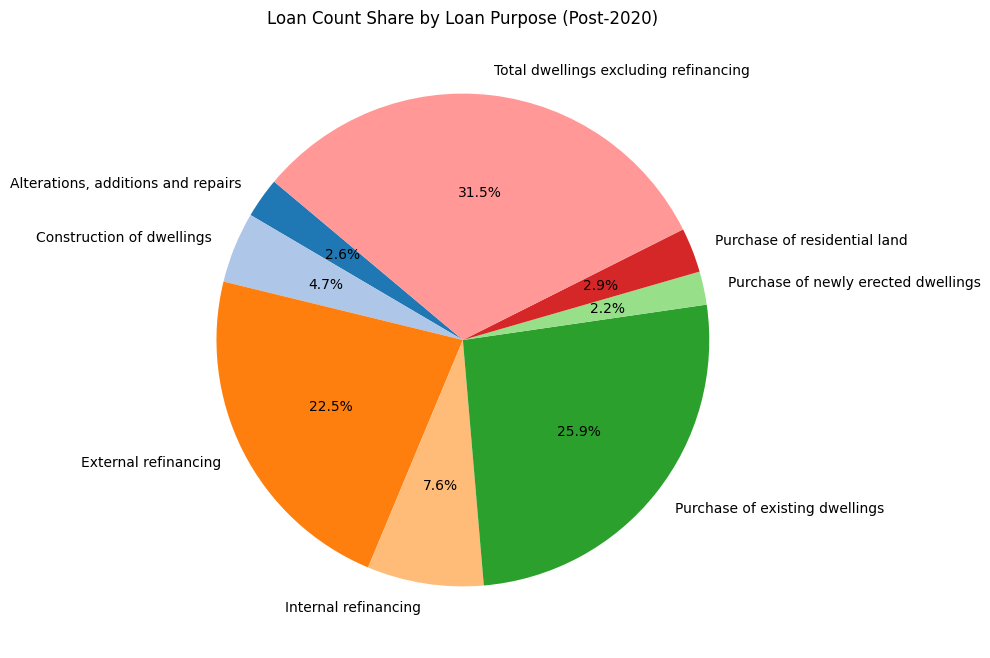

In [49]:


# Filter data for post-2020
df_post_2020 = df_investor_purpose[df_investor_purpose['date'].dt.year > 2020]

# Group by loan purpose and sum loan_count
loan_counts = df_post_2020.groupby('loan_purpose')['loan_count'].sum()

# Convert to percentage
loan_counts_percent = 100 * loan_counts / loan_counts.sum()

# Plot Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(
    loan_counts_percent, 
    labels=loan_counts_percent.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.tab20.colors
)
plt.title('Loan Count Share by Loan Purpose (Post-2020)')
plt.show()


# Loan Count Share by Loan Purpose (Post-2020)

The pie chart illustrates the distribution of **loan counts** across different **loan purposes** for data after 2020. The percentages represent each category's contribution to the total loan count.

## Key Observations

- **Total dwellings excluding refinancing** is the largest category, contributing **31.5%** of all loans. This indicates a strong demand for dwellings that are not part of refinancing activities.  
- **Purchase of existing dwellings** accounts for **25.9%**, reflecting continued interest in established properties.  
- **External refinancing** makes up **22.5%**, showing a significant portion of loans is directed toward refinancing from other lenders.  
- **Internal refinancing** contributes **7.6%**, highlighting a smaller but notable trend of refinancing within the same lender.  
- **Construction of dwellings** and **Alterations, additions and repairs** account for **4.7%** and **2.6%**, respectively, indicating moderate investment in new construction and property improvements.  
- **Purchase of residential land** and **Purchase of newly erected dwellings** are the smallest segments (**2.9%** and **2.2%**), suggesting limited activity in these categories post-2020.

## Summary

The majority of loans after 2020 are concentrated in **property acquisition and refinancing**, with relatively lower activity in construction, renovations, and land purchases. This distribution highlights the market's focus on acquiring and refinancing existing dwellings rather than investing in new builds or land.


In [50]:
# Save cleaned dataframe to CSV
df_investor_purpose.to_csv("../Datasets/Cleaned_Data/Investor_Purpose.csv", index=False)


#### **RBA DATA**

In [53]:
# Load CSV file
df_interest = pd.read_csv("../Datasets/df_interest.csv")
df_interest.head(5)

,date,Cash_Rate,Housing_Credit,Owner_Credit,Investor_Credit
0,2019-07-31,1.00,4.05,3.8,4.3
1,2019-08-31,1.00,4.05,3.8,4.3
2,2019-09-30,1.00,4.05,3.8,4.3
3,2019-10-31,0.75,3.90,3.7,4.1
4,2019-11-30,0.75,3.85,3.7,4.0


In [54]:
df_interest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             77 non-null     object 
 1   Cash_Rate        77 non-null     float64
 2   Housing_Credit   77 non-null     float64
 3   Owner_Credit     77 non-null     float64
 4   Investor_Credit  77 non-null     float64
dtypes: float64(4), object(1)
memory usage: 3.1+ KB


**Convert data to datetime**

In [57]:
df_interest["date"] = pd.to_datetime(df_interest["date"])

In [58]:
df_interest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             77 non-null     datetime64[ns]
 1   Cash_Rate        77 non-null     float64       
 2   Housing_Credit   77 non-null     float64       
 3   Owner_Credit     77 non-null     float64       
 4   Investor_Credit  77 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 3.1 KB


In [59]:
df_interest.isnull().sum()

date               0
Cash_Rate          0
Housing_Credit     0
Owner_Credit       0
Investor_Credit    0
dtype: int64

In [60]:
df_interest.duplicated().sum()

np.int64(0)

* no null values and duplicated records in data

**Checking Outliers**

Cash_Rate Outliers:
 Empty DataFrame
Columns: [Cash_Rate]
Index: [] 

Housing_Credit Outliers:
 Empty DataFrame
Columns: [Housing_Credit]
Index: [] 

Owner_Credit Outliers:
 Empty DataFrame
Columns: [Owner_Credit]
Index: [] 

Investor_Credit Outliers:
 Empty DataFrame
Columns: [Investor_Credit]
Index: [] 



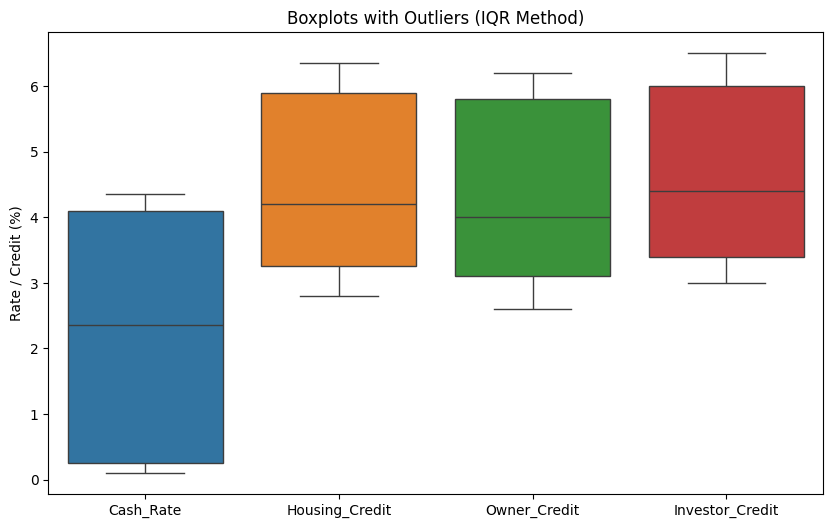

In [62]:
# Columns to check
cols = ['Cash_Rate', 'Housing_Credit', 'Owner_Credit', 'Investor_Credit']

# Calculate IQR and filter outliers (optional if you want to remove them)
for col in cols:
    Q1 = df_interest[col].quantile(0.25)
    Q3 = df_interest[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df_interest[(df_interest[col] < lower) | (df_interest[col] > upper)]
    print(f"{col} Outliers:\n", outliers[[col]], "\n")

# Plot boxplots
plt.figure(figsize=(10,6))
sns.boxplot(data=df_interest[cols])
plt.title('Boxplots with Outliers (IQR Method)')
plt.ylabel('Rate / Credit (%)')
plt.show()

* NO outliers detected

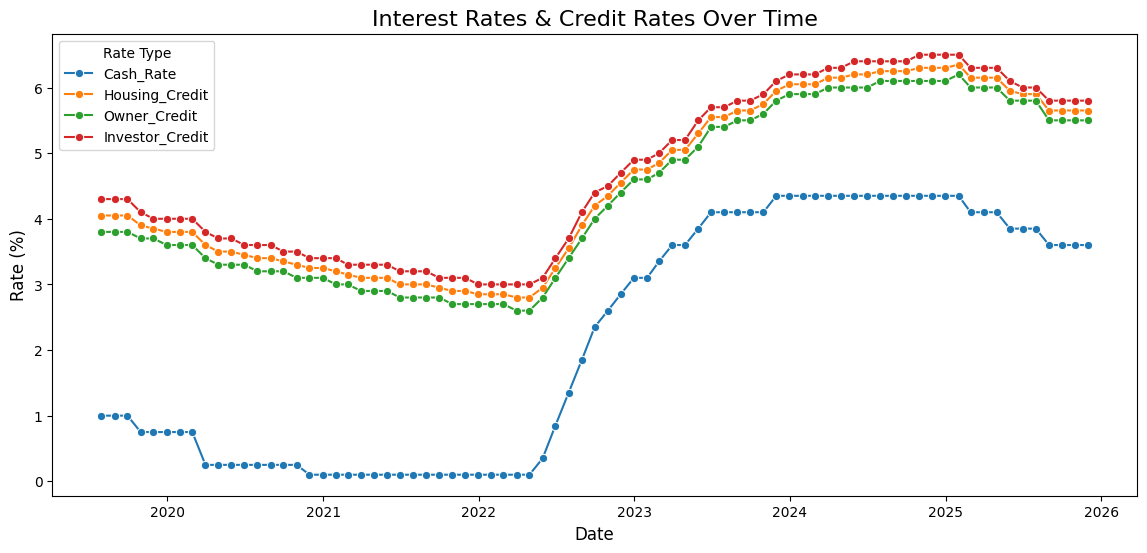

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Melt the DataFrame to long format for plotting
df_melt = df_interest.melt(
    id_vars='date', 
    value_vars=['Cash_Rate', 'Housing_Credit', 'Owner_Credit', 'Investor_Credit'],
    var_name='Rate_Type', 
    value_name='Rate_Value'
)

# Plot
plt.figure(figsize=(14,6))
sns.lineplot(data=df_melt, x='date', y='Rate_Value', hue='Rate_Type', marker='o')
plt.title('Interest Rates & Credit Rates Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Rate (%)', fontsize=12)
plt.legend(title='Rate Type')
plt.show()


# Analysis: Interest Rates & Credit Rates Over Time (2019–2026)

## 1. Cash Rate Trend (Blue Line)
- The Cash Rate started at **1% in mid-2019** and declined sharply during **2020**, reaching a **historic low around 0.1%** in 2021.
- This drop aligns with the RBA’s policy to stimulate the economy during the COVID-19 pandemic.
- From **2022 onwards**, the Cash Rate increased steadily, peaking around **4.35% in 2024**, reflecting monetary tightening to control inflation.
- A slight decline is observed towards **2025–2026**, indicating potential stabilization.

## 2. Housing, Owner, and Investor Credit Rates (Orange, Green, Red Lines)
- These rates closely follow the Cash Rate trend, with a consistent spread of approximately **2.5–3% above the Cash Rate**.
- All three rates **dropped during 2020–2021**, reflecting low borrowing costs during the pandemic.
- A sharp increase begins in **2022**, peaking in **2024**, showing lenders’ response to rising Cash Rates.
- **Investor Credit** consistently remains slightly higher than Housing and Owner Credit, reflecting higher risk.

## 3. Key Observations
- **Pandemic Impact:** Extremely low rates across all categories during 2020–2021.
- **Rate Spread:** Investor Credit > Housing Credit > Owner Credit > Cash Rate throughout the period.
- **Volatility:** Credit rates are more stable than Cash Rate but exhibit sharp upward trends post-2022.
- **Recent Trend:** Slight decline in rates in 2025–2026, indicating market adjustment after aggressive hikes.

## 4. Implications
- **For Borrowers:** Borrowing costs for investors and owner-occupiers rose sharply after 2022, impacting affordability and investment decisions.
- **For Analysts/Investors:** The spread between Cash Rate and credit rates indicates lender risk premiums and market stress.


In [ ]:
# Save cleaned dataframe to CSV
df_interest.to_csv("../Datasets/Cleaned_Data/Interest_Rates.csv", index=False)


### **Customers Data**

In [3]:
# Load CSV file
df_customers = pd.read_csv("../Datasets/customers.csv")
df_customers.head(5)

,customer_id,age,income,employment_type,dependents,state,credit_score_band
0,1,60,56310.0,Full-time,0,NSW,Low
1,2,50,53746.0,Full-time,2,SA,Low
2,3,36,54968.0,Self-employed,1,SA,Low
3,4,64,149510.0,Full-time,0,WA,Good
4,5,29,34636.0,Full-time,0,VIC,Low


In [5]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        10000 non-null  int64  
 1   age                10000 non-null  int64  
 2   income             10000 non-null  float64
 3   employment_type    10000 non-null  object 
 4   dependents         10000 non-null  int64  
 5   state              10000 non-null  object 
 6   credit_score_band  10000 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 547.0+ KB


In [6]:
df_customers.describe()

,customer_id,age,income,dependents
count,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,43.490300,67603.751700,0.844300
std,2886.89568,12.578375,35645.238041,0.909472
min,1.00000,22.000000,9430.000000,0.000000
25%,2500.75000,33.000000,42583.750000,0.000000
50%,5000.50000,43.500000,59806.000000,1.000000
75%,7500.25000,54.000000,83711.500000,1.000000
max,10000.00000,65.000000,330812.000000,3.000000


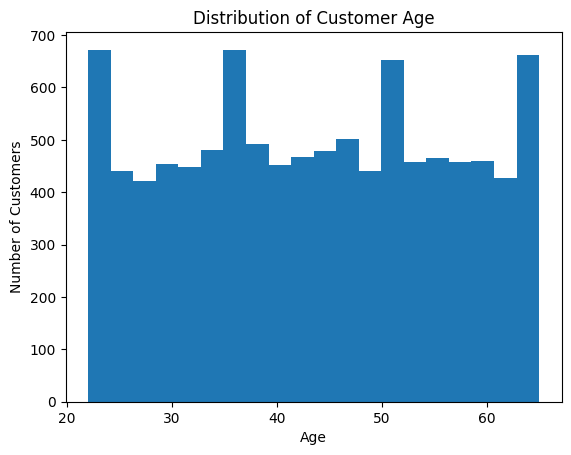

In [7]:
# Age distribution
plt.figure()
plt.hist(df_customers["age"], bins=20)
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.title("Distribution of Customer Age")
plt.show()


### Customer Age Distribution (Synthetic Data)

The histogram of customer age shows a broadly uniform distribution between approximately 22 and 65 years, corresponding to typical mortgage-eligible working ages. There are no extreme outliers at either end of the age range, and the distribution does not exhibit strong skewness or clustering around specific age groups.

This pattern is expected given the synthetic nature of the dataset and reflects an intentional design choice to avoid introducing age-related bias at the data generation stage. By maintaining a balanced age distribution, the dataset ensures that loan approval outcomes are not trivially driven by age alone, allowing other financial and risk-related features such as income, loan-to-value ratio, interest rate, and broker experience to play a more meaningful role in the predictive modelling process.

Overall, the age distribution appears realistic and suitable for downstream machine learning tasks, providing a stable and unbiased foundation for modelling mortgage loan approval outcomes.


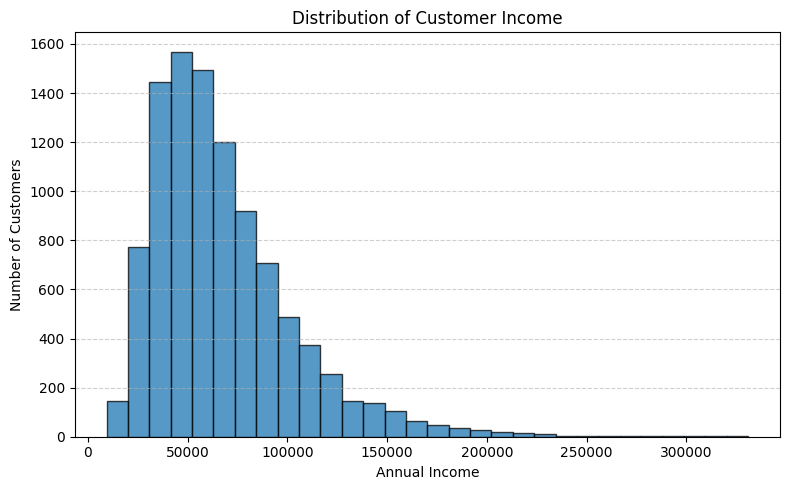

In [9]:
plt.figure(figsize=(8, 5))

plt.hist(
    df_customers["income"],
    bins=30,
    edgecolor="black",
    alpha=0.75
)

plt.xlabel("Annual Income")
plt.ylabel("Number of Customers")
plt.title("Distribution of Customer Income")

plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()


### Customer Income Distribution (Synthetic Data)

The income distribution of synthetic customers exhibits a clear right-skewed pattern, which is characteristic of real-world income data. Most customers fall within a lower to middle income range, with a gradually decreasing frequency as income levels increase, and a long tail representing higher-income earners.

This shape is consistent with the log-normal distribution used during data generation and supports the realism of the synthetic dataset. The absence of negative or implausibly low income values, along with a smooth decline at higher income levels, indicates that the income variable has been generated in a stable and controlled manner.

From a modelling perspective, this skewed distribution is appropriate for mortgage approval analysis, as income plays a central role in determining borrowing capacity, property values, and loan-to-value ratios. The observed variability ensures sufficient differentiation across customers, allowing the machine learning model to learn meaningful relationships between income and loan approval outcomes.


**Employment type distribution**

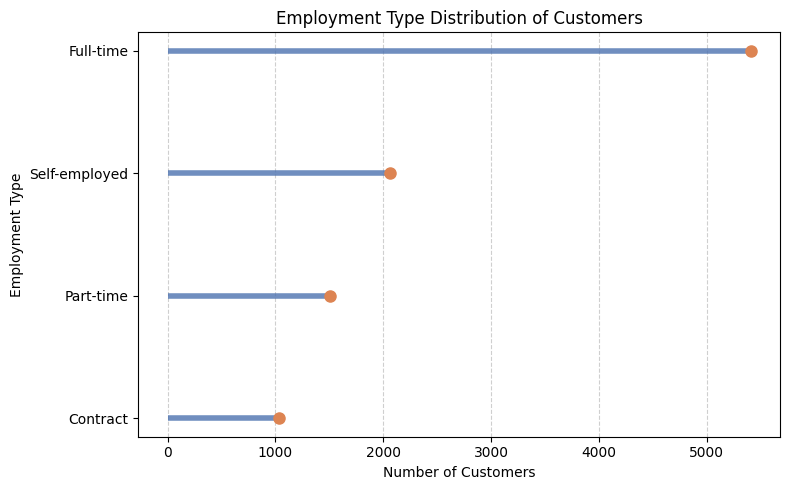

In [12]:
import matplotlib.pyplot as plt

# Employment type counts
counts = df_customers["employment_type"].value_counts().sort_values()

plt.figure(figsize=(8, 5))

# Lollipop stems
plt.hlines(
    y=counts.index,
    xmin=0,
    xmax=counts.values,
    color="#4C72B0",      # soft blue
    linewidth=4,
    alpha=0.8
)

# Lollipop heads
plt.plot(
    counts.values,
    counts.index,
    "o",
    color="#DD8452",      # contrasting orange
    markersize=8
)

plt.xlabel("Number of Customers")
plt.ylabel("Employment Type")
plt.title("Employment Type Distribution of Customers")

plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


### Employment Type Distribution (Synthetic Data)

The employment type distribution of synthetic customers shows a clear dominance of full-time employment, followed by self-employed and part-time workers, with contract employment representing the smallest group. This ordering aligns with realistic borrower profiles typically observed in mortgage application contexts, where stable, full-time employment is more prevalent among applicants.

The relative proportions across employment categories reflect the probabilities defined during data generation and indicate that no category is under-represented or excessively dominant to the extent that it would distort model training. In particular, the presence of self-employed and contract workers introduces heterogeneity in income stability, which is an important factor in mortgage risk assessment.

From a modelling perspective, this balanced yet differentiated distribution supports the inclusion of employment type as a categorical feature. It enables the machine learning model to learn nuanced relationships between employment stability and loan approval outcomes without being biased by extreme class imbalance.


**Income vs credit score band**

C:\Users\DeLL\AppData\Local\Temp\ipykernel_11740\2830861167.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(


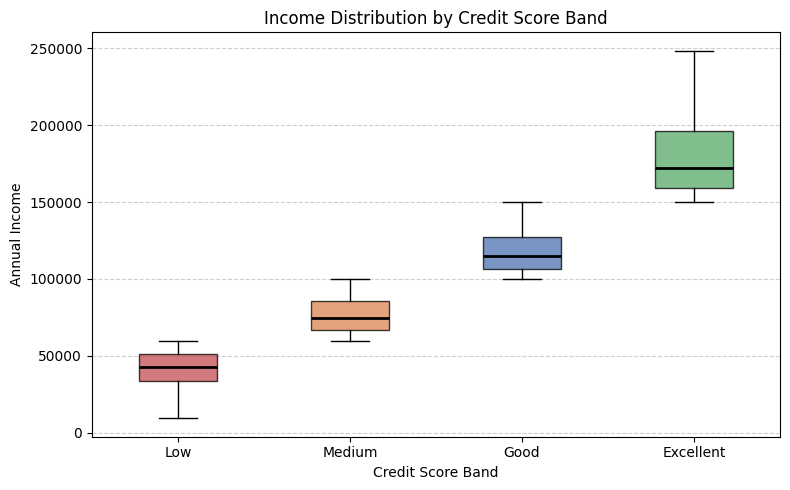

In [13]:
import matplotlib.pyplot as plt

# Prepare data grouped by credit score band
bands = ["Low", "Medium", "Good", "Excellent"]
income_data = [
    df_customers[df_customers["credit_score_band"] == band]["income"]
    for band in bands
]

# Colors for each credit score band
colors = ["#C44E52", "#DD8452", "#4C72B0", "#55A868"]

plt.figure(figsize=(8, 5))

box = plt.boxplot(
    income_data,
    labels=bands,
    patch_artist=True,
    showfliers=False
)

# Apply colors
for patch, color in zip(box["boxes"], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.75)

# Style median lines
for median in box["medians"]:
    median.set_color("black")
    median.set_linewidth(2)

plt.xlabel("Credit Score Band")
plt.ylabel("Annual Income")
plt.title("Income Distribution by Credit Score Band")

plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


### Income Distribution by Credit Score Band (Synthetic Data)

The boxplot illustrates a clear and monotonic relationship between income levels and credit score bands. Median income increases consistently from the Low credit score band through to the Excellent band, confirming that higher credit score categories are associated with stronger income profiles in the synthetic dataset.

While there is some overlap in income ranges across adjacent credit score bands, the overall separation remains distinct. This overlap is desirable, as it reflects realistic borrower scenarios where income alone does not fully determine credit quality, and additional factors such as employment stability, existing liabilities, and loan characteristics may influence credit outcomes.

From a modelling perspective, this pattern validates the internal consistency of the feature engineering process used to generate credit score bands. The observed relationship supports the inclusion of credit score band as a meaningful categorical predictor in the loan approval model without introducing artificial or perfectly separable boundaries that could lead to overfitting.


In [14]:
# Save cleaned dataframe to CSV
df_customers.to_csv("../Datasets/Cleaned_Data/Customers.csv", index=False)


### **Broker Data** 

In [15]:
# Load CSV file
df_brokers = pd.read_csv("../Datasets/brokers.csv")
df_brokers.head(5)

,broker_id,brand,experience_years,store_location,conversion_rate,active_loans
0,1,Aussie,17,NSW,0.393159,238
1,2,Smartline,9,WA,0.191806,90
2,3,Mortgage Choice,1,QLD,0.169634,15
3,4,Loan Market,20,QLD,0.304614,200
4,5,Lendi,13,WA,0.320752,91


In [16]:
df_brokers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   broker_id         500 non-null    int64  
 1   brand             500 non-null    object 
 2   experience_years  500 non-null    int64  
 3   store_location    500 non-null    object 
 4   conversion_rate   500 non-null    float64
 5   active_loans      500 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 23.6+ KB


**Broker experience distribution**

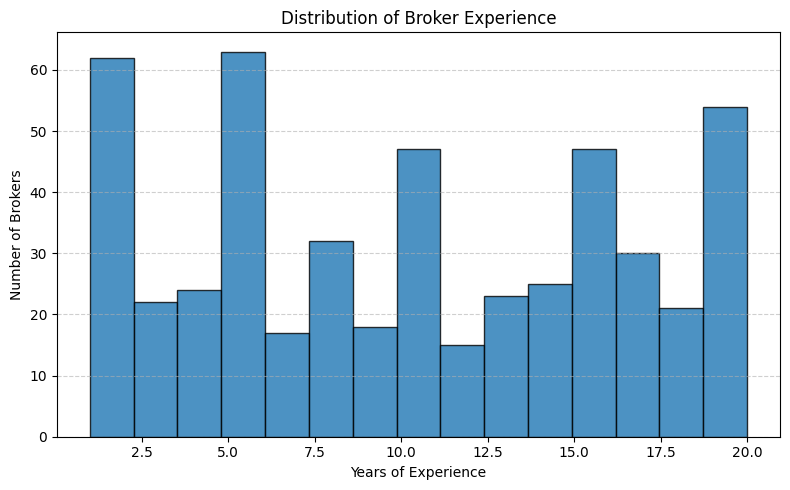

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

plt.hist(
    df_brokers["experience_years"],
    bins=15,
    edgecolor="black",
    alpha=0.8
)

plt.xlabel("Years of Experience")
plt.ylabel("Number of Brokers")
plt.title("Distribution of Broker Experience")

plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


### Broker Experience Distribution (Synthetic Data)

The distribution of broker experience spans a wide range from 1 to 20 years, indicating a diverse mix of junior, mid-level, and highly experienced brokers within the synthetic dataset. Experience levels are broadly spread across the range, with no extreme clustering at the lower or upper ends.

This balanced distribution suggests that the broker population is not dominated by a single experience group, which is important for modelling purposes. It allows the machine learning model to learn varying effects of broker experience on loan outcomes, such as differences in conversion efficiency and application quality.

Overall, the experience distribution appears realistic and suitable for downstream analysis, supporting the inclusion of broker experience as a meaningful numerical feature in the loan approval modelling process.


**Conversion Rate distribution for brokers.**

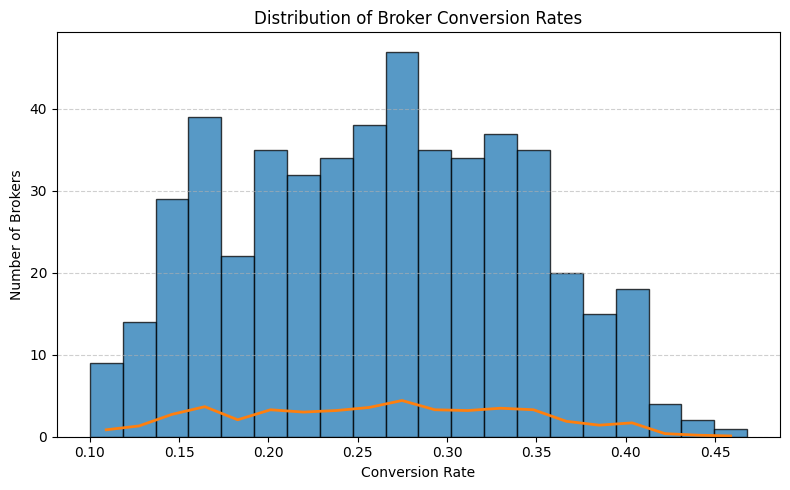

In [18]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 5))

# Histogram (bars)
counts, bins, patches = plt.hist(
    df_brokers["conversion_rate"],
    bins=20,
    edgecolor="black",
    alpha=0.75
)

# Add a line overlay (density-style using normalized histogram)
bin_centers = 0.5 * (bins[1:] + bins[:-1])
density = counts / counts.sum()

plt.plot(
    bin_centers,
    density * counts.max(),
    linewidth=2
)

plt.xlabel("Conversion Rate")
plt.ylabel("Number of Brokers")
plt.title("Distribution of Broker Conversion Rates")

plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


### Broker Conversion Rate Distribution (Synthetic Data)

The distribution of broker conversion rates shows a smooth and continuous spread across a plausible range, with most values concentrated between approximately 0.15 and 0.35. There are no extreme spikes near zero or one, indicating that broker performance levels have been generated in a realistic and controlled manner.

The shape of the distribution suggests moderate variability in broker effectiveness, reflecting differences in experience, client handling, and application quality. The absence of sharp discontinuities or clustering supports the assumption that conversion rates vary gradually rather than falling into discrete performance groups.

From a modelling perspective, this distribution is well suited for inclusion as a numerical feature. It provides sufficient variation for the machine learning model to learn the influence of broker performance on loan approval outcomes without introducing instability or unrealistic dominance by outlier brokers.


**Broker Experience vs Conversion Rate**

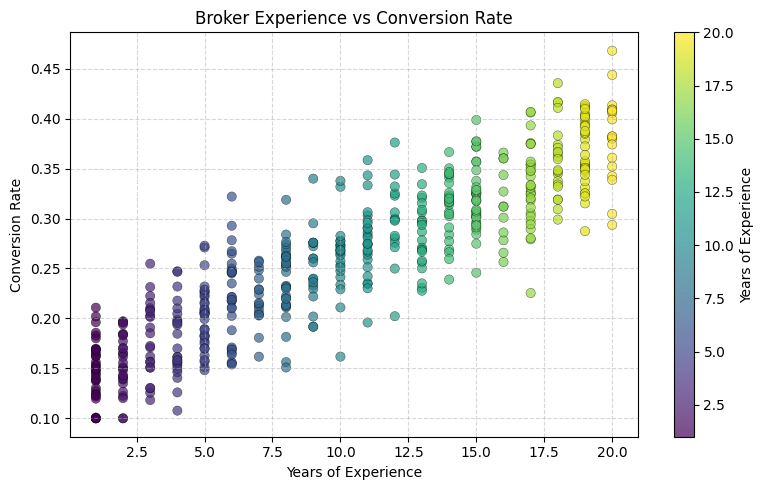

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

# Scatter plot
plt.scatter(
    df_brokers["experience_years"],
    df_brokers["conversion_rate"],
    s=45,
    alpha=0.7,
    c=df_brokers["experience_years"],   # colour by experience
    cmap="viridis",
    edgecolors="black",
    linewidths=0.3
)

plt.xlabel("Years of Experience")
plt.ylabel("Conversion Rate")
plt.title("Broker Experience vs Conversion Rate")

cbar = plt.colorbar()
cbar.set_label("Years of Experience")

plt.grid(linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


### Broker Experience vs Conversion Rate (Synthetic Data)

- Conversion rates show a clear positive relationship with broker experience, with higher experience levels generally associated with improved performance.
- Considerable dispersion is present at each experience level, indicating that experience alone does not fully determine conversion outcomes.
- The gradual upward trend, rather than a perfectly linear pattern, reflects realistic performance variability across brokers.
- This relationship validates the synthetic data generation logic and supports the inclusion of both broker experience and conversion rate as meaningful features in the loan approval model.


**Brand vs Active Loans**

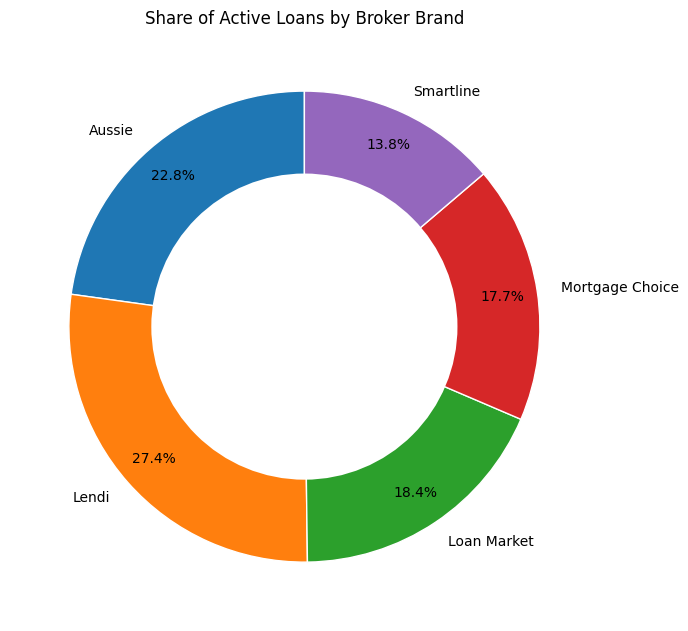

In [20]:
import matplotlib.pyplot as plt

# Aggregate active loans by brand
brand_active_loans = df_brokers.groupby("brand")["active_loans"].sum()

plt.figure(figsize=(7, 7))

wedges, texts, autotexts = plt.pie(
    brand_active_loans.values,
    labels=brand_active_loans.index,
    autopct="%1.1f%%",
    startangle=90,
    pctdistance=0.85,
    wedgeprops={"edgecolor": "white"}
)

# Donut hole
centre_circle = plt.Circle((0, 0), 0.65, fc="white")
plt.gca().add_artist(centre_circle)

plt.title("Share of Active Loans by Broker Brand")
plt.tight_layout()
plt.show()


### Share of Active Loans by Broker Brand (Synthetic Data)

- Active loans are unevenly distributed across broker brands, indicating differences in operational scale and workload.
- Larger broker networks manage a disproportionately higher share of active loans, reflecting broader customer reach and broker capacity.
- Mid-sized brands maintain a substantial but smaller share, suggesting balanced portfolios without extreme concentration.
- Smaller brands account for a lower proportion of active loans, which may be influenced by fewer brokers or lower average experience levels.
- This distribution provides useful context for subsequent analysis of brand-level loan approval outcomes and broker performance.


In [21]:
# Save cleaned dataframe to CSV
df_brokers.to_csv("../Datasets/Cleaned_Data/Brokers.csv", index=False)


## **Loan Application Data**

In [22]:
# Load CSV file
df_loan_applications = pd.read_csv("../Datasets/loan_applications.csv")
df_loan_applications.head(5)

,application_id,customer_id,broker_id,brand,application_channel,submitted_date,loan_amount,property_value,lvr,interest_rate,approved
0,1,7271,168,Lendi,Online,2022-06-21,238381.0,270397.0,0.881596,4.94,1
1,2,861,293,Mortgage Choice,Broker,2022-11-01,267329.0,385223.0,0.693959,4.32,1
2,3,5391,374,Loan Market,Online,2017-11-13,396190.0,498657.0,0.794514,4.02,0
3,4,5192,49,Loan Market,Online,2024-05-16,177813.0,233186.0,0.762537,4.85,0
4,5,5735,250,Mortgage Choice,Online,2023-08-15,195103.0,250535.0,0.778745,4.57,1


In [23]:
df_loan_applications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   application_id       20000 non-null  int64  
 1   customer_id          20000 non-null  int64  
 2   broker_id            20000 non-null  int64  
 3   brand                20000 non-null  object 
 4   application_channel  20000 non-null  object 
 5   submitted_date       20000 non-null  object 
 6   loan_amount          20000 non-null  float64
 7   property_value       20000 non-null  float64
 8   lvr                  20000 non-null  float64
 9   interest_rate        20000 non-null  float64
 10  approved             20000 non-null  int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 1.7+ MB


**LVR distribution**

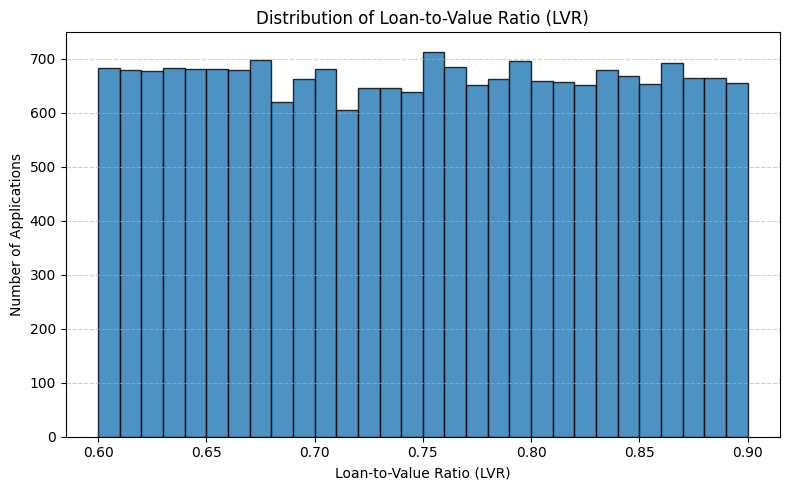

In [24]:

plt.figure(figsize=(8, 5))

plt.hist(
    df_loan_applications["lvr"],
    bins=30,
    edgecolor="black",
    alpha=0.8
)

plt.xlabel("Loan-to-Value Ratio (LVR)")
plt.ylabel("Number of Applications")
plt.title("Distribution of Loan-to-Value Ratio (LVR)")

plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


### Loan-to-Value Ratio (LVR) Distribution (Synthetic Loan Applications)

- The distribution of loan-to-value ratios spans smoothly between approximately 0.60 and 0.90, which aligns with typical lending thresholds observed in mortgage markets.
- No LVR values exceed 1.0, indicating that all loans are financially plausible and do not imply borrowing in excess of property value.
- The relatively even spread across the range reflects the synthetic generation process and avoids excessive clustering at specific LVR levels.
- This distribution provides sufficient variability for modelling credit risk, allowing the machine learning model to learn how increasing leverage influences loan approval outcomes.
- Overall, the LVR values appear realistic and appropriate for downstream analysis of interest rates and approval decisions.


**Loan Amount distribution**

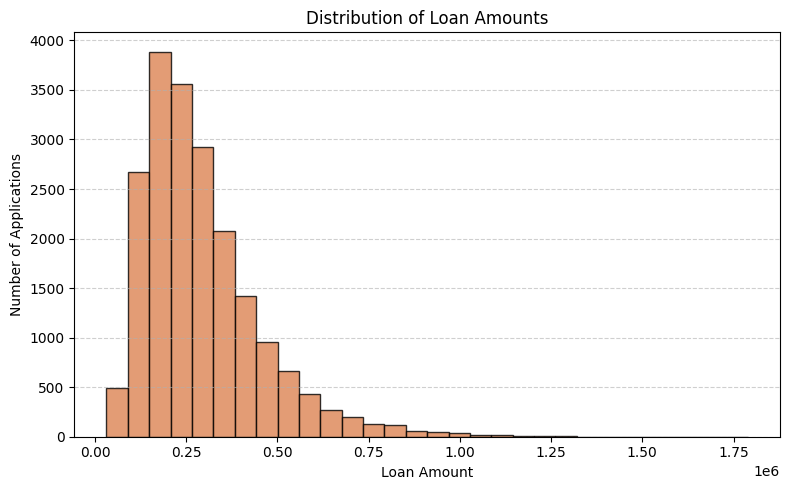

In [26]:
plt.figure(figsize=(8, 5))

plt.hist(
    df_loan_applications["loan_amount"],
    bins=30,
    color="#DD8452",      # warm orange
    edgecolor="black",
    alpha=0.8
)

plt.xlabel("Loan Amount")
plt.ylabel("Number of Applications")
plt.title("Distribution of Loan Amounts")

plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


### Loan Amount Distribution

- The loan amount distribution is strongly right-skewed, with the majority of applications concentrated in lower to mid-range loan values and a long tail of higher-value loans.
- This pattern is consistent with typical mortgage markets, where most borrowers take moderate-sized loans and fewer applicants borrow at very high amounts.
- There are no negative or implausible loan values, indicating that the synthetic generation process produced financially valid loan amounts.
- The presence of a long tail ensures sufficient variability in loan sizes, which is important for modelling how loan scale interacts with risk metrics such as LVR, interest rates, and approval outcomes.
- Overall, the distribution appears realistic and suitable for downstream machine learning analysis without requiring additional transformation at the EDA stage.


**Interest Rate Distribution**

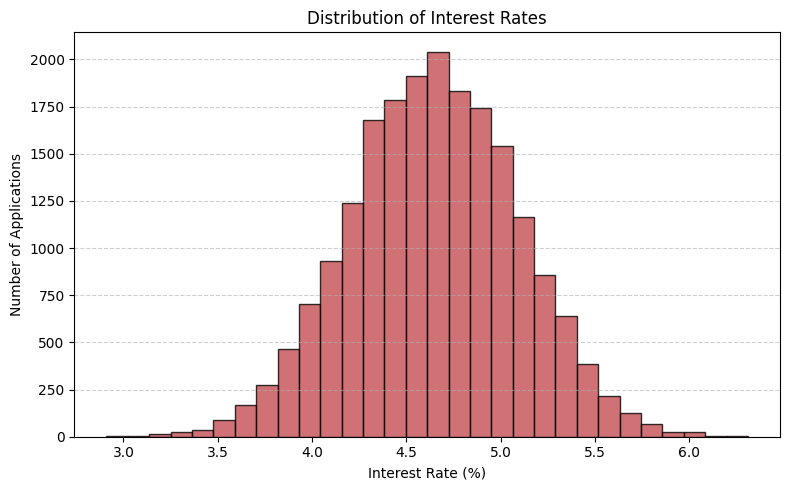

In [ ]:

plt.figure(figsize=(8, 5))

plt.hist(
    df_loan_applications["interest_rate"],
    bins=30,
    color="#C44E52",      # muted red (risk-related variable)
    edgecolor="black",
    alpha=0.8
)

plt.xlabel("Interest Rate (%)")
plt.ylabel("Number of Applications")
plt.title("Distribution of Interest Rates")

plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


### Interest Rate Distribution (Synthetic Loan Applications)

- The interest rate distribution is approximately bell-shaped, with most loan applications clustered around mid-range interest rates.
- Rates span a plausible range, with no negative or extreme values, indicating realistic pricing of credit across applications.
- The concentration around the central range reflects the influence of underlying risk factors such as LVR, while the tails capture higher- and lower-risk borrowing scenarios.
- This smooth distribution suggests that interest rates vary gradually rather than discretely, which is appropriate for modelling continuous risk-based pricing.
- Overall, the interest rate variable appears well-behaved and suitable for analysing its relationship with loan approval outcomes in subsequent steps.


**Approval Outcome Distribution**

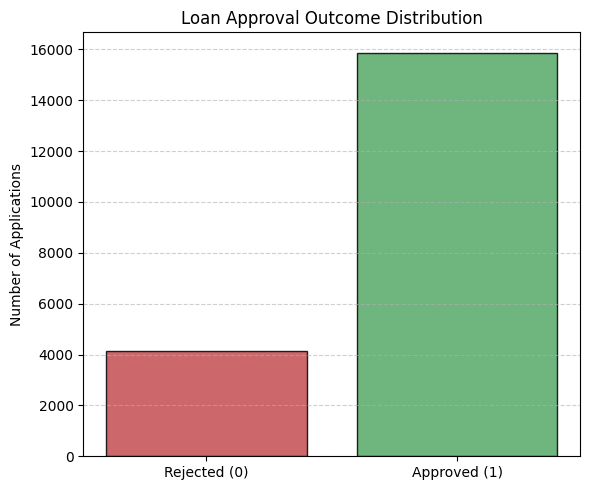

In [28]:

# Approval counts
counts = df_loan_applications["approved"].value_counts().sort_index()
labels = ["Rejected (0)", "Approved (1)"]

plt.figure(figsize=(6, 5))

plt.bar(
    labels,
    counts.values,
    color=["#C44E52", "#55A868"],  # red = rejected, green = approved
    edgecolor="black",
    alpha=0.85
)

plt.ylabel("Number of Applications")
plt.title("Loan Approval Outcome Distribution")

plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


### Loan Approval Outcome Distribution (Synthetic Loan Applications)

- The approval outcome exhibits a clear class imbalance, with approved applications significantly outnumbering rejected ones.
- Such imbalance can bias machine learning models toward the majority class, potentially reducing the model’s ability to correctly identify rejected applications.
- To address this issue, **SMOTE (Synthetic Minority Over-sampling Technique)** will be applied during the model training phase to balance the class distribution and improve minority-class learning.
- Applying SMOTE only to the training data will help prevent information leakage while enhancing model robustness.
- Despite the imbalance, the presence of a substantial number of rejected applications provides sufficient signal for learning meaningful decision boundaries.
- Overall, this class structure reflects realistic lending scenarios and can be effectively managed through appropriate resampling and evaluation strategies.


**Approval vs Loan-to-Value Ratio (LVR)**

C:\Users\DeLL\AppData\Local\Temp\ipykernel_11740\3072810576.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("lvr_bin")["approved"]


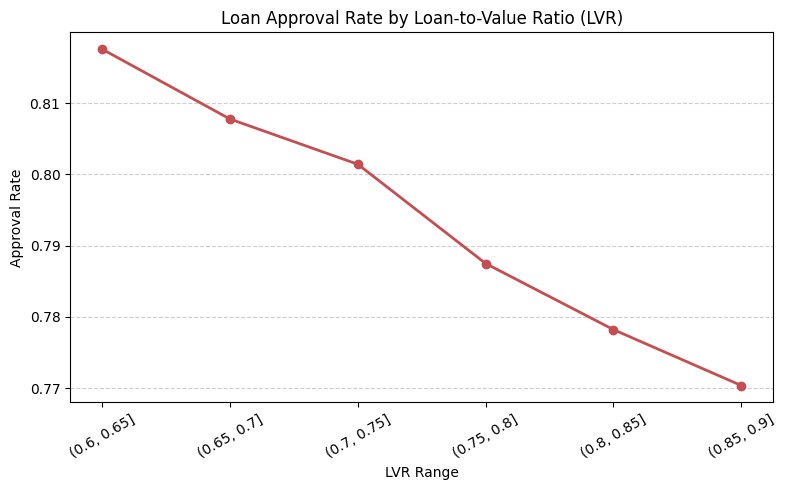

In [29]:

# Bin LVR
df_loan_applications["lvr_bin"] = pd.cut(
    df_loan_applications["lvr"],
    bins=[0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9]
)

# Compute approval rate per bin
approval_rate = (
    df_loan_applications
    .groupby("lvr_bin")["approved"]
    .mean()
)

plt.figure(figsize=(8, 5))

plt.plot(
    approval_rate.index.astype(str),
    approval_rate.values,
    marker="o",
    linewidth=2,
    color="#C44E52"
)

plt.xlabel("LVR Range")
plt.ylabel("Approval Rate")
plt.title("Loan Approval Rate by Loan-to-Value Ratio (LVR)")

plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


### Loan Approval Rate by Loan-to-Value Ratio (LVR)

- The approval rate shows a clear downward trend as the loan-to-value ratio increases.
- Applications with lower LVRs (below 0.65) exhibit the highest approval rates, reflecting lower credit risk due to stronger borrower equity positions.
- As LVR rises, approval rates decline steadily, indicating stricter lending outcomes for higher-leverage loans.
- This pattern aligns with standard mortgage risk assessment practices, where higher LVRs are associated with increased default risk.
- The smooth and monotonic relationship confirms that the synthetic data generation process has successfully embedded realistic risk-based approval behaviour.
- From a modelling perspective, this result validates LVR as a highly informative predictor for loan approval classification.


**Loan Approval Rate by Interest Rate**

C:\Users\DeLL\AppData\Local\Temp\ipykernel_11740\4210686469.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("rate_bin")["approved"]


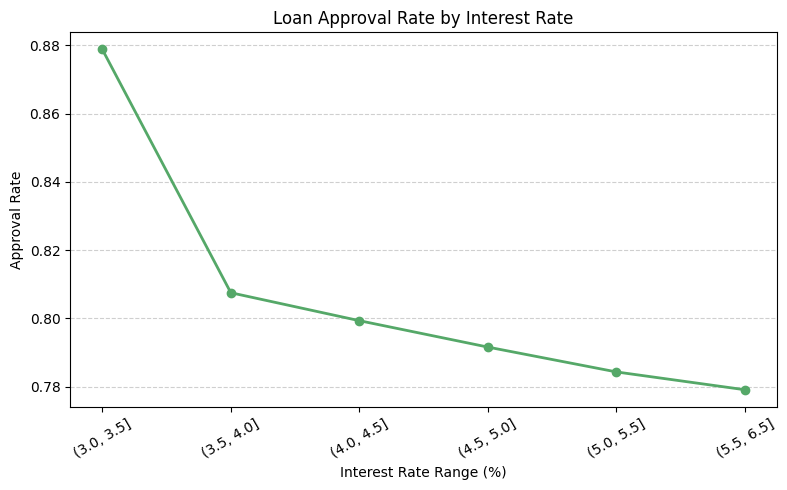

In [30]:

# Bin interest rates
df_loan_applications["rate_bin"] = pd.cut(
    df_loan_applications["interest_rate"],
    bins=[3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.5]
)

# Compute approval rate per bin
approval_rate_ir = (
    df_loan_applications
    .groupby("rate_bin")["approved"]
    .mean()
)

plt.figure(figsize=(8, 5))

plt.plot(
    approval_rate_ir.index.astype(str),
    approval_rate_ir.values,
    marker="o",
    linewidth=2,
    color="#55A868"   # green, different from LVR plot
)

plt.xlabel("Interest Rate Range (%)")
plt.ylabel("Approval Rate")
plt.title("Loan Approval Rate by Interest Rate")

plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


### Loan Approval Rate by Interest Rate (Synthetic Loan Applications)

- The approval rate declines steadily as interest rates increase, indicating an inverse relationship between cost of credit and loan approval likelihood.
- Applications with lower interest rates exhibit the highest approval rates, reflecting lower perceived borrower risk.
- As interest rates rise, approval rates decrease gradually rather than sharply, suggesting a smooth risk-based pricing and approval mechanism.
- This pattern is consistent with standard lending practices, where higher interest rates are typically associated with higher-risk applications.
- From a modelling perspective, the observed trend confirms that interest rate is a meaningful predictor of loan approval outcomes and complements LVR in capturing borrower risk.


**Property Value vs Loan Amount**

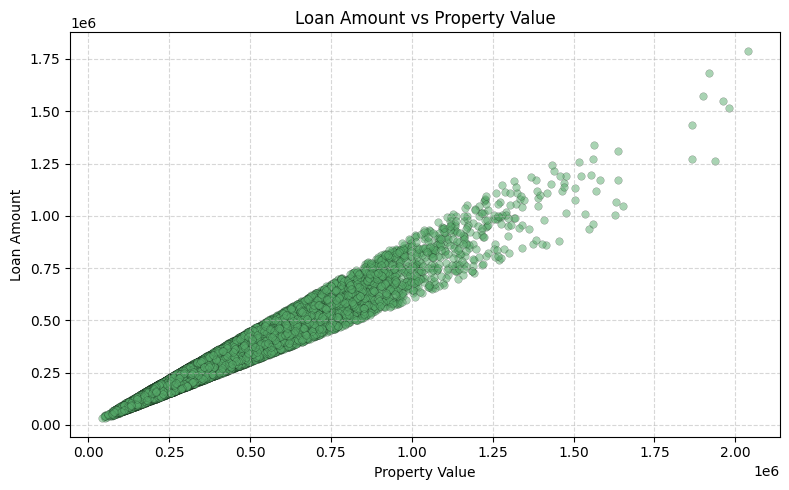

In [33]:

plt.figure(figsize=(8, 5))

plt.scatter(
    df_loan_applications["property_value"],
    df_loan_applications["loan_amount"],
    alpha=0.5,
    s=30,
    color="#55A868",
    edgecolors="black",
    linewidths=0.2
)

plt.xlabel("Property Value")
plt.ylabel("Loan Amount")
plt.title("Loan Amount vs Property Value")

plt.grid(linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


### Loan Amount vs Property Value (Synthetic Loan Applications)

- The scatter plot shows a strong positive linear relationship between property value and loan amount, which is consistent with standard mortgage lending behaviour.
- Loan amounts are consistently lower than corresponding property values, indicating that all applications respect realistic loan-to-value constraints.
- The spread around the implied linear relationship reflects variation in LVR across borrowers, capturing differences in equity contributions.
- Higher property values are associated with greater dispersion in loan amounts, suggesting more diverse borrowing strategies at the upper end of the market.
- Overall, this relationship confirms the internal financial consistency of the synthetic dataset and supports the validity of derived features such as LVR for subsequent modelling.


In [38]:
# Save cleaned dataframe to CSV
df_loan_applications.to_csv("../Datasets/Cleaned_Data/Loan_Applications.csv", index=False)
